In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from collections import Counter


In [2]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape


(88883, 85)

In [3]:
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', None)

                                                           მონაცემთა დამუშავება 

                                                ზრდა-კლების მიხედვით დალაგების ფუნქცია 

In [4]:
def sort_dict_by_value(Dictionary, reverse = False):        # ალაგებს ზრდის-კლების მიხედვით 
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

                                                         გრაფიკის აგების ფუნქცია    

In [5]:

def Build_Barh_sizes( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()

                                                        სიების სორტირების ფუქნცია

In [6]:
def list_sorter_counter(filtered_list):
  
    global key_Phrases    # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
    global Quantity       # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
    

    union = []                          # ერთი დიდი სია 


    for i in filtered_list:
        for k in i :  
            union.append(k)          # ერთ დიდი სიაში აერთიანებს ყველაფერს 
            

    

    Counted = Counter(union)             # დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება



    Counted = sort_dict_by_value(Counted, False)  #იყენებს ძემოთა ფუქნციას


    key_Phrases = []  #ინახავს ფრაზებს
    Quantity = []   # ინახავს რაოდენობას 



    items = Counted.items()    # ფაქტიურად დიქშინარის გარდაქმნის ლისთად


    for item in items:        # ანაწილებს ფრაზებს და რაოდენობებს სათანადო სიებში
        key_Phrases.append(item[0])   # უშვებს ფრაზებს
        Quantity.append(item[1])      # უშვებს რიცხვით მნიშვნელობებს


In [7]:
def year_5_to_50(sorted_list):
    global Phrases_5_to_50
    global quantity_5_to_50

    ########## ვქმნით სხვადასხვა ასაკის შესანახად ცარიელ ლისთებს #################
    less_than_5 = []
    from_5_to_9 = []
    from_10_to_14 = []
    from_15_to_19 = []
    from_20_to_24 = []
    from_25_to_29 = []
    from_30_to_34 = []
    from_35_to_39 = []
    from_40_to_44 = []
    from_45_to_49 = []
    more_than_50 =[]

    ########## ვანაცვლებთ ერთ წელზე ნაკლებს და 50 წელზე მეტს 1-ით და 50-ით ########
    sorted_list = np.array(sorted_list)
    sorted_list = np.where(sorted_list == 'Less than 1 year', "1", sorted_list)
    sorted_list = np.where(sorted_list == 'More than 50 years', "50", sorted_list)

    
    ######## ვანაწილებთ სხვადასხვა ასაკს თავის შესაბამის ლისტში ######
    for i in sorted_list:
        if i in str(list(range(0,5))):
            less_than_5.append(i)
        elif i in str(list(range(5,10))):
            from_5_to_9.append(i)
        elif i in str(list(range(10,15))):
            from_10_to_14.append(i)
        elif i in str(list(range(15,20))):
            from_15_to_19.append(i)
        elif i in str(list(range(20,25))):
            from_20_to_24.append(i)
        elif i in str(list(range(25,30))):
            from_25_to_29.append(i)
        elif i in str(list(range(30,35))):
            from_30_to_34.append(i)
        elif i in str(list(range(35,40))):
            from_35_to_39 .append(i)
        elif i in str(list(range(40,45))):
            from_40_to_44.append(i)
        elif i in str(list(range(45,50))):
            from_45_to_49.append(i)
        elif i in str(list(range(50,100))):
            more_than_50.append(i)
            

    ######### ვანაწილებთ რაოდენობებს და შესაბამის შუალედებს 2 სხვადასხვა ლისტში #############
    Phrases_5_to_50= ["less than 5", "5 to 9", "10 to 14", "15 to 19", "20 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 or more"]
    quantity_5_to_50 = [len(less_than_5), len(from_5_to_9), len(from_10_to_14), len(from_15_to_19), len(from_20_to_24), len(from_25_to_29), len(from_30_to_34), len(from_35_to_39), len(from_40_to_44), len(from_45_to_49), len(more_than_50)]

    Phrases_5_to_50.reverse()      ###### ეს რაღაცა ჯანდაბა ატრიალებს გრაფიკს, ამუ თავში რაც იყო ზევით მიდის და პირიქით #######
    quantity_5_to_50.reverse()

   


In [8]:
def year_10_to_30(sorted_list):
    global Phrases_10_to_30
    global Quantity_10_to_30
    ########## ვქმნით სხვადასხვა ასაკის შესანახად ცარიელ ლისთებს #################

    less_than_10 = []
    from_10_to_11 = []
    from_12_to_13 = []
    from_14_to_15 = []
    from_16_to_17 = []
    from_18_to_19 = []
    from_20_to_21 = []
    from_22_to_23 = []
    from_24_to_25 = []
    from_26_to_27 = []
    from_28_to_29 = []
    more_than_30 =[]


    ########## ვანაცვლებთ ხუთ წელზე ნაკლებს და 85 წელზე მეტს 5-ით და 85-ით ########

    sorted_list = np.array(sorted_list)
    sorted_list = np.where(sorted_list == 'Younger than 5 years', "5", sorted_list)
    sorted_list = np.where(sorted_list == 'Older than 85', "85", sorted_list)

    ######## ვანაწილებთ სხვადასხვა ასაკს თავის შესაბამის ლისტში ######

    for i in sorted_list:
        if i in str(list(range(0,10))):
            less_than_10.append(i)
        elif i in str(list(range(10,12))):
            from_10_to_11.append(i)
        elif i in str(list(range(12,14))):
            from_12_to_13.append(i)
        elif i in str(list(range(14,16))):
            from_14_to_15.append(i)
        elif i in str(list(range(16,18))):
            from_16_to_17.append(i)
        elif i in str(list(range(18,20))):
            from_18_to_19.append(i)
        elif i in str(list(range(20,22))):
            from_20_to_21.append(i)
        elif i in str(list(range(22,24))):
            from_22_to_23 .append(i)
        elif i in str(list(range(24,26))):
            from_24_to_25.append(i)
        elif i in str(list(range(26,28))):
            from_26_to_27.append(i)
        elif i in str(list(range(28,30))):
            from_28_to_29.append(i)
        elif i in str(list(range(30,100))):
            more_than_30.append(i)
            







    ######### ვანაწილებთ რაოდენობებს და შესაბამის შუალედებს 2 სხვადასხვა ლისტში #############

    Phrases_10_to_30= ["less than 10", "10 to 11", "12 to 13", "14 to 15", "16 to 17", "18 to 19", "20 to 21", "22 to 23", "24 to 25", "26 to 27", " 28 to 29", "30 or more"]
    Quantity_10_to_30 = [len(less_than_10), len(from_10_to_11), len(from_12_to_13), len(from_14_to_15), len(from_16_to_17), len(from_18_to_19), len(from_20_to_21),  len(from_22_to_23), len(from_24_to_25),  len(from_26_to_27), len(from_28_to_29), len(more_than_30)]

    Phrases_10_to_30.reverse()      ###### ეს რაღაცა ჯანდაბა ატრიალებს გრაფიკს, ამუ თავში რაც იყო ზევით მიდის და პირიქით #######
    Quantity_10_to_30.reverse()

    

In [9]:
def year_15_to_60(sorted_list):
    global Phrases_15_to_60
    global quantity_15_to_60

    ########## ვქმნით სხვადასხვა ასაკის შესანახად ცარიელ ლისთებს #################
    less_than_15 = []
    from_15_to_19 = []
    from_20_to_24 = []
    from_25_to_29 = []
    from_30_to_34 = []
    from_35_to_39 = []
    from_40_to_44 = []
    from_45_to_49 = []
    from_50_to_54 = []
    from_55_to_59 = []
    more_than_60 =[]

    
    ######## ვანაწილებთ სხვადასხვა ასაკს თავის შესაბამის ლისტში ######
    for i in sorted_list:
        if int(i) in list(range(0,15)):
            less_than_15.append(i)
        elif int(i) in list(range(15,20)):
            from_15_to_19.append(i)
        elif int(i) in list(range(20,25)):
            from_20_to_24.append(i)
        elif int(i) in list(range(25,30)):
            from_25_to_29.append(i)
        elif int(i) in list(range(30,35)):
            from_30_to_34.append(i)
        elif int(i) in list(range(35,40)):
            from_35_to_39.append(i)
        elif int(i) in list(range(40,45)):
            from_40_to_44.append(i)
        elif int(i) in list(range(45,50)):
            from_45_to_49 .append(i)
        elif int(i) in list(range(50,55)):
            from_50_to_54.append(i)
        elif int(i) in list(range(55,60)):
            from_55_to_59.append(i)
        elif int(i) in list(range(60,100)):
            more_than_60.append(i)
            

    ######### ვანაწილებთ რაოდენობებს და შესაბამის შუალედებს 2 სხვადასხვა ლისტში #############
    Phrases_15_to_60= ["less than 5", "15_to_19", "20_to_24", "25_to_29", "30_to_34", "35_to_39", "40_to_44", "45_to_49", "50_to_54", "55_to_59", "60 or more"]
    quantity_15_to_60 = [len(less_than_15), len(from_15_to_19), len(from_20_to_24), len(from_25_to_29), len(from_30_to_34), len(from_35_to_39), len(from_40_to_44), len(from_45_to_49), len(from_40_to_44), len(from_55_to_59), len(more_than_60)]

    Phrases_15_to_60.reverse()      ###### ეს რაღაცა ჯანდაბა ატრიალებს გრაფიკს, ამუ თავში რაც იყო ზევით მიდის და პირიქით #######
    quantity_15_to_60.reverse()

    

                                                            მონაცემთა დამუშავება

                                                                Developer Type      

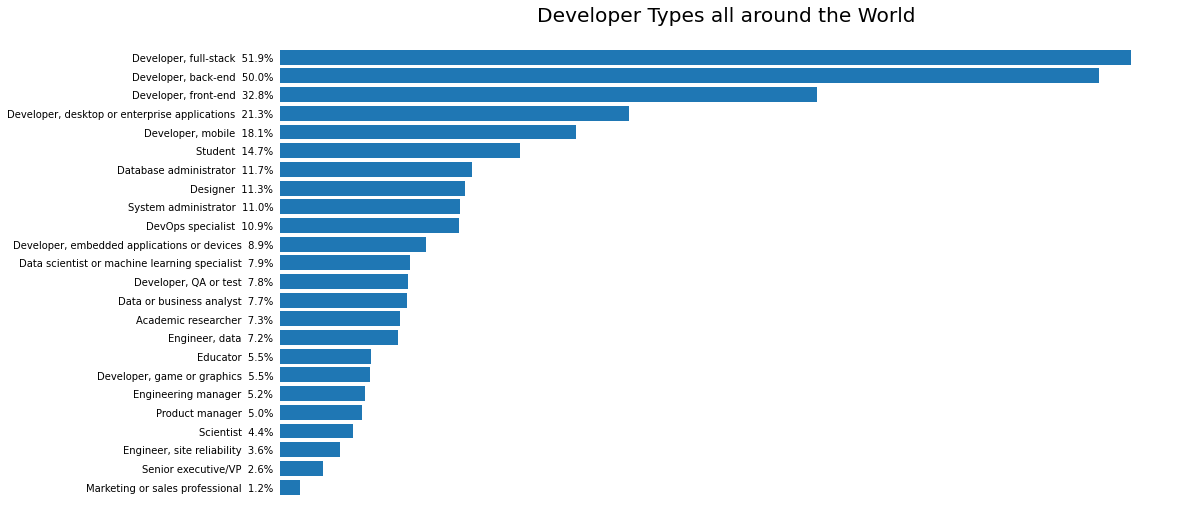

In [10]:
DevType = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType.dropna( inplace=True)   # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType = DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(DevType)  # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types all around the World") # ვაგებთ გრაფიკს


                                                                    OpenSourcer

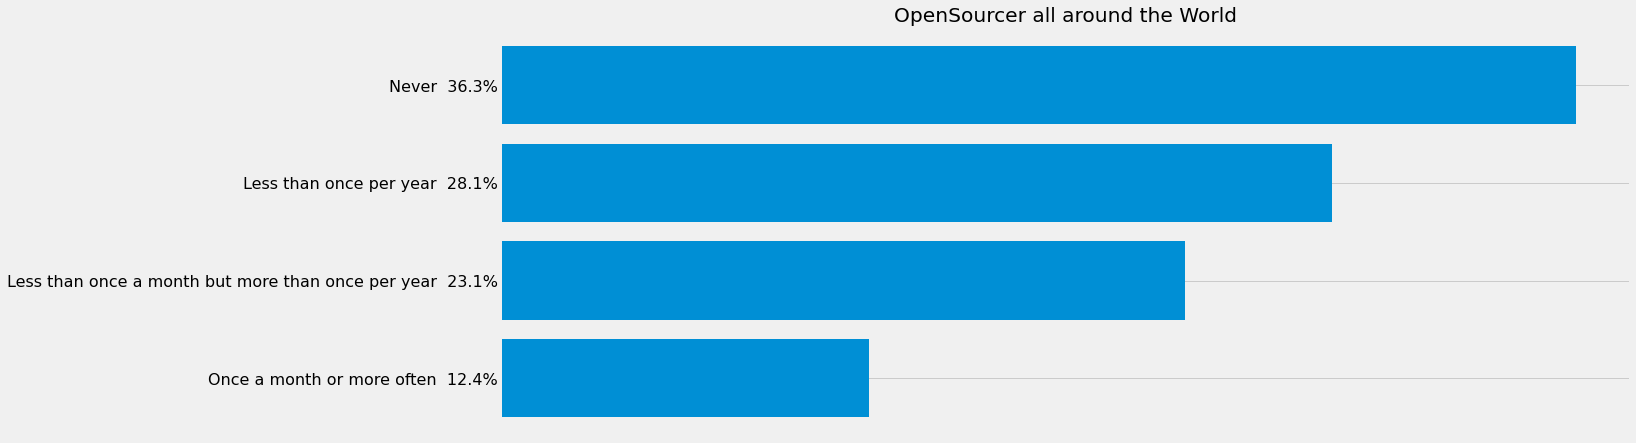

In [11]:
OpenSourcer = data["OpenSourcer"]  # ვიხებთ მხოლოდ OpenSourcer-ის ინფოს

counted = Counter(OpenSourcer)  # ვითვლით OpenSourcer-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით OpenSourcer-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, OpenSourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


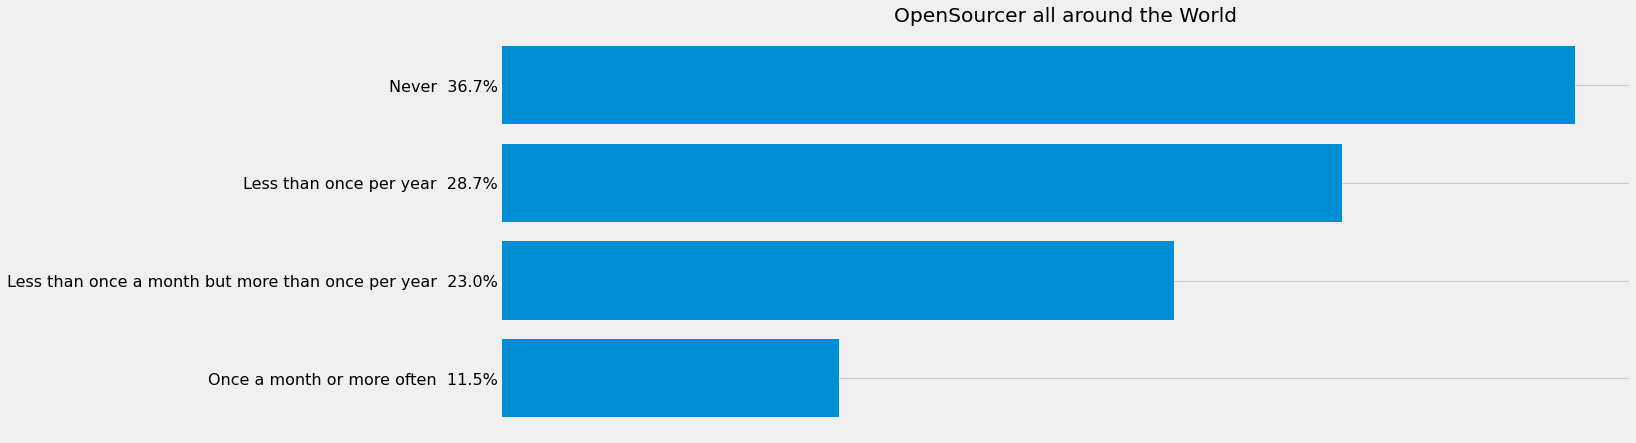

In [12]:
OpenSourcer_USA = data["OpenSourcer"]

OpenSourcer_USA.dropna(inplace = True)

OpenSourcer = data[(OpenSourcer_USA!= "NaN") & (data["Country"] == "United States")]  


New_Opensourcer = OpenSourcer["OpenSourcer"]

counted = Counter(New_Opensourcer)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Opensourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


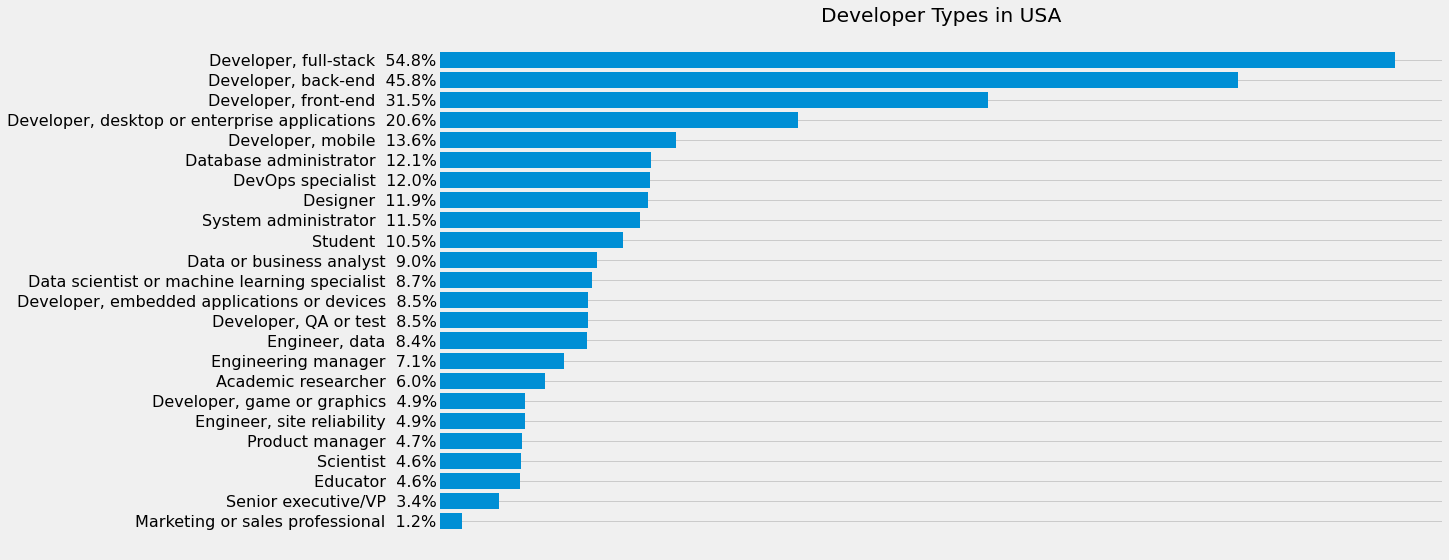

In [13]:
DevType_Filtered = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType =data[(DevType_Filtered != "NaN") & (data["Country"] == "United States")]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის USA-სთან



New_DevType = DevType["DevType"]  # ვინაცავთ ახალ ცვლადში

New_DevType = New_DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_DevType)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_DevType ,"fivethirtyeight", False , (16,9), "Developer Types in USA") # ვაგებთ გრაფიკს

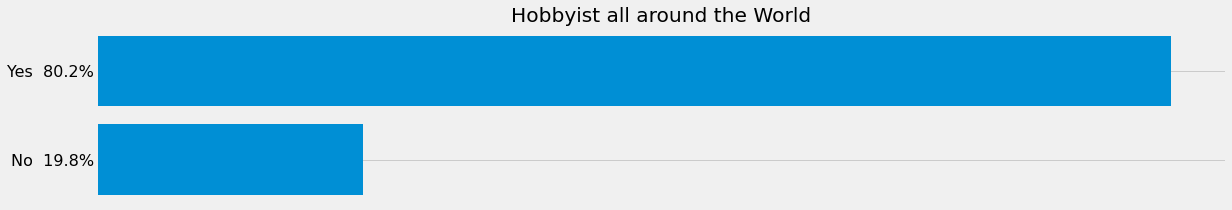

In [14]:
Hobbyist = data["Hobbyist"]

counted = Counter(Hobbyist)  # ვითვლით OpenSourcer-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით Hobbyist-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Hobbyist ,"fivethirtyeight", False , (18,3), "Hobbyist all around the World")   # ვაგებთ გრაფიკს



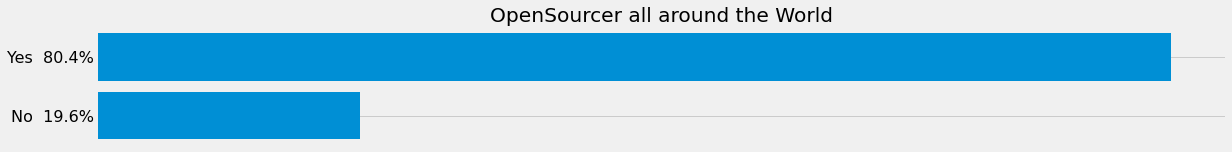

In [15]:
Hobbyist_USA = data["OpenSourcer"]

Hobbyist_USA.dropna(inplace = True)

Hobbyist = data[(Hobbyist_USA != "NaN") & (data["Country"] == "United States")]  


New_Hobbyist= Hobbyist["Hobbyist"]

counted = Counter(New_Hobbyist)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Hobbyist ,"fivethirtyeight", False , (18,2), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


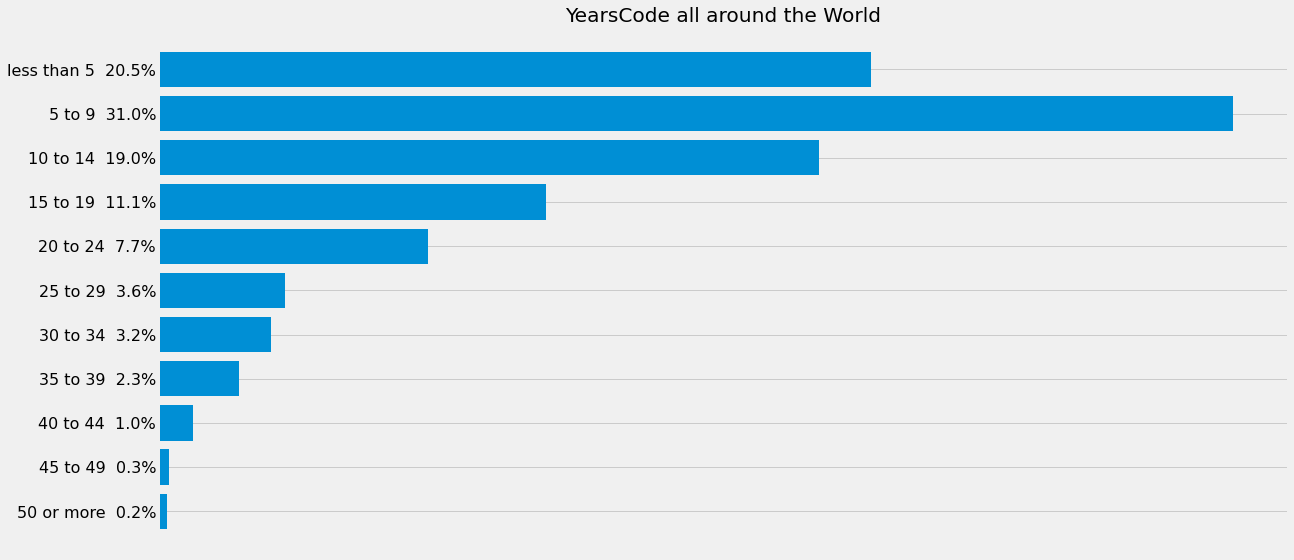

In [16]:
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(YearsCode)


##### ამით კიდე გრაფიკს ვაგებთაა  ##########
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, YearsCode, "fivethirtyeight", False , (18,9), "YearsCode all around the World")   # ვაგებთ გრაფიკს

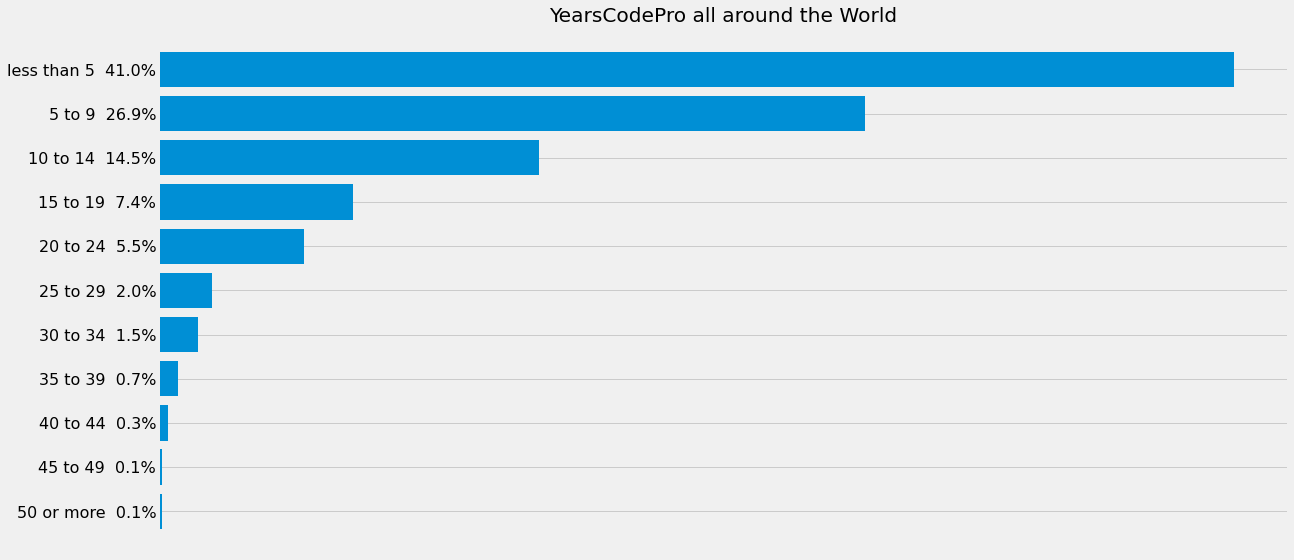

In [17]:
YearsCodePro = data["YearsCodePro"]
YearsCodePro.dropna(inplace=True)


######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(YearsCodePro)


##### ამით კიდე გრაფიკს ვაგებთაა  ##########
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, YearsCodePro, "fivethirtyeight", False , (18,9), "YearsCodePro all around the World")   # ვაგებთ გრაფიკს


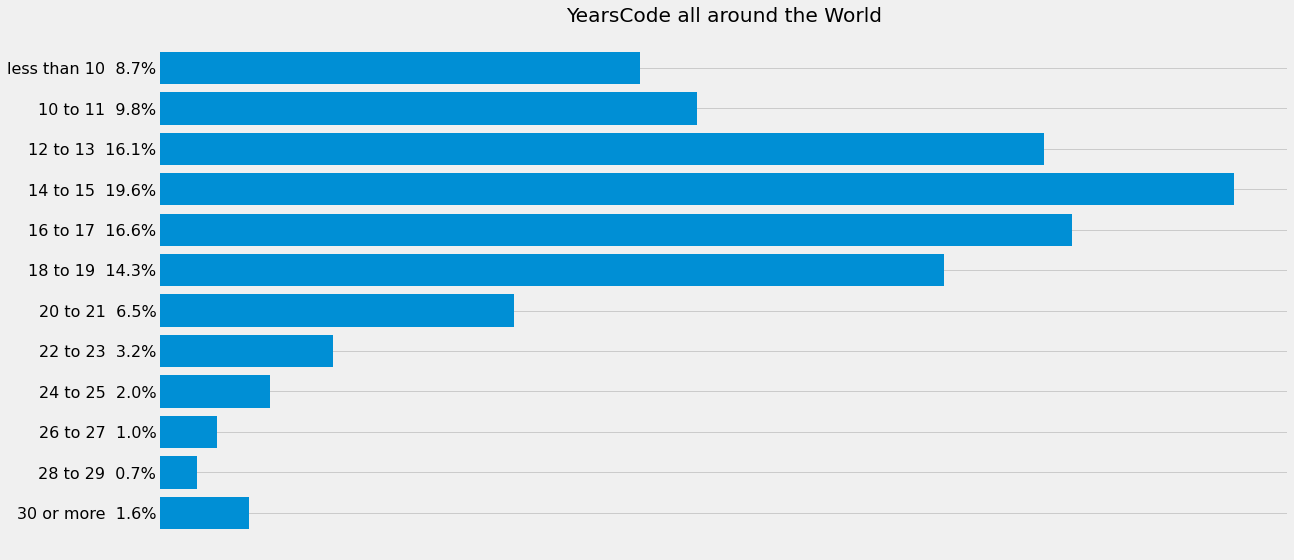

In [18]:
Age1stCode = data["Age1stCode"]
Age1stCode.dropna(inplace = True)


year_10_to_30(Age1stCode)

##### ამით კიდე გრაფიკს ვაგებთაა  ##########
Build_Barh_sizes( Phrases_10_to_30, Quantity_10_to_30, Age1stCode, "fivethirtyeight", False , (18,9), "YearsCode all around the World")   

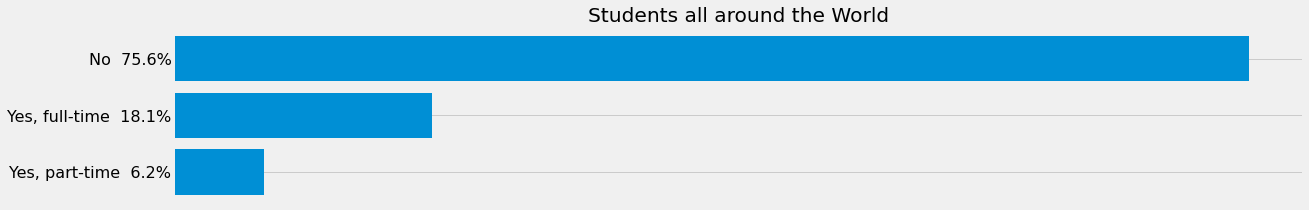

In [19]:
Student = data["Student"]
Student.dropna(inplace = True)
counted = Counter(Student)  # ვითვლით student-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით Student-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Student ,"fivethirtyeight", False , (18,3), "Students all around the World")   # ვაგებთ გრაფიკს






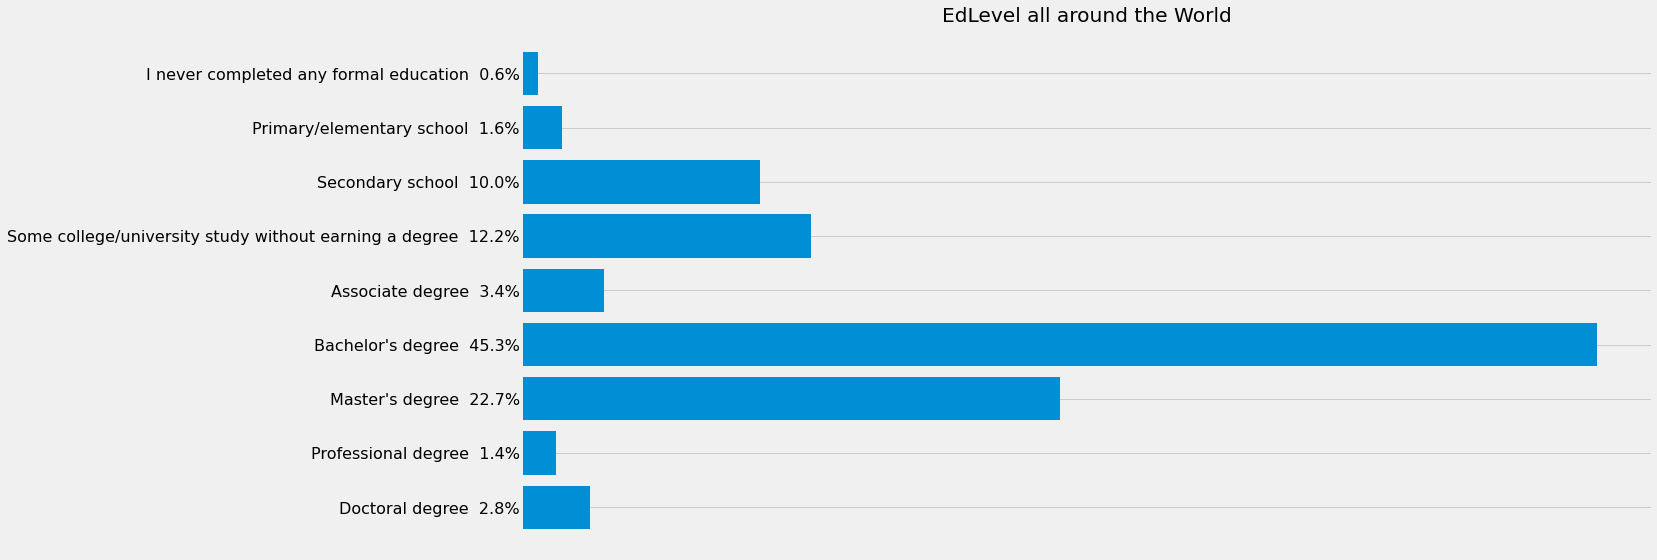

In [20]:

EdLevel = data["EdLevel"]
EdLevel.dropna(inplace = True)


######### ვქმნით ცარიელ სიებს, სადაც უნდა შევინახოთ შესაბამისი მონაცემები #########
no_education = []
primary_school = []
secondary_school = []
collage_degree = []
associate_degree = []
bachelor_degree = []
master_degree = []
professional_degree = []
doctoral_degree = []


########## ვანაწილებთ ფრაზებს შესაბამის სიებში ########
for i in EdLevel:
    if i=="I never completed any formal education":
        no_education.append(i)
    elif i=="Primary/elementary school":
        primary_school.append(i)
    elif i=='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':
        secondary_school.append(i)
    elif i=='Some college/university study without earning a degree':
        collage_degree.append(i)
    elif i=='Associate degree':
        associate_degree.append(i)
    elif i=='Bachelor’s degree (BA, BS, B.Eng., etc.)':
        bachelor_degree.append(i)
    elif i=='Master’s degree (MA, MS, M.Eng., MBA, etc.)':
        master_degree.append(i)
    elif i ==  'Professional degree (JD, MD, etc.)':
        professional_degree.append(i)
    elif i== 'Other doctoral degree (Ph.D, Ed.D., etc.)':
        doctoral_degree.append(i)





######## ვაკეთებთ ფრაზების და მათი შესაბამისი რაოდენობების შესანახ სიას #####3
key_Phrases=[ "I never completed any formal education", "Primary/elementary school", "Secondary school", "Some college/university study without earning a degree", "Associate degree", "Bachelor's degree", "Master's degree", "Professional degree", "Doctoral degree"]  # ვქმნით ფრაზების შესანახ ლისთს


#### აქ პირდაპირ დავწერე თითოეული სიის სიგრძე ცალკე რო აღარ მეწერა #########
Quantity = [len(no_education), len( primary_school), len(secondary_school), len(collage_degree), len(associate_degree), len(bachelor_degree), len(master_degree), len( professional_degree), len(doctoral_degree)]

########## ამის საშუალებით ვაბრუნებთ გრაფიკზე დატანილ მონაცემებს #########
key_Phrases.reverse()
Quantity.reverse()

#### ამით ვაგებთ გრაფიკსა ##########
Build_Barh_sizes( key_Phrases , Quantity, EdLevel ,"fivethirtyeight", False , (18,9), "EdLevel all around the World")   


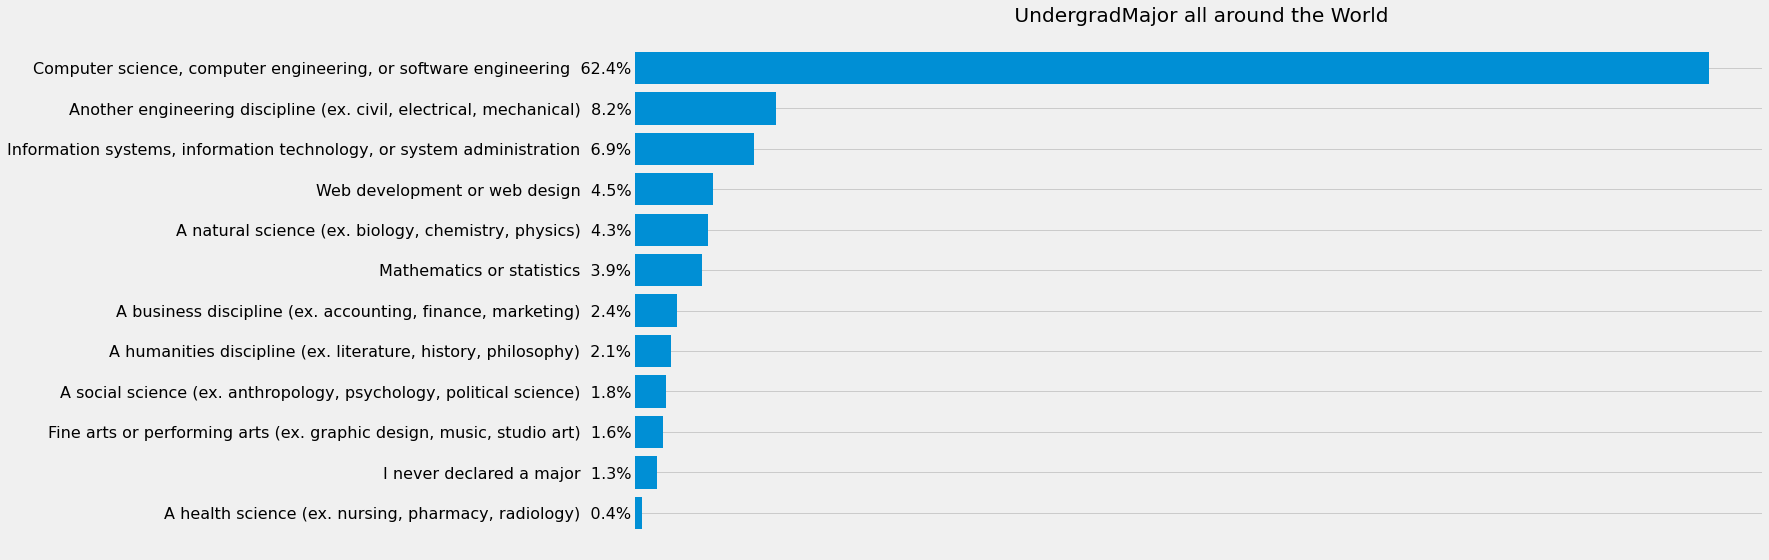

In [21]:
UndergradMajor = data["UndergradMajor"]
UndergradMajor.dropna(inplace = True)


counted = Counter(UndergradMajor)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, UndergradMajor ,"fivethirtyeight", False , (18,9), " UndergradMajor all around the World")   # ვაგებთ გრაფიკს




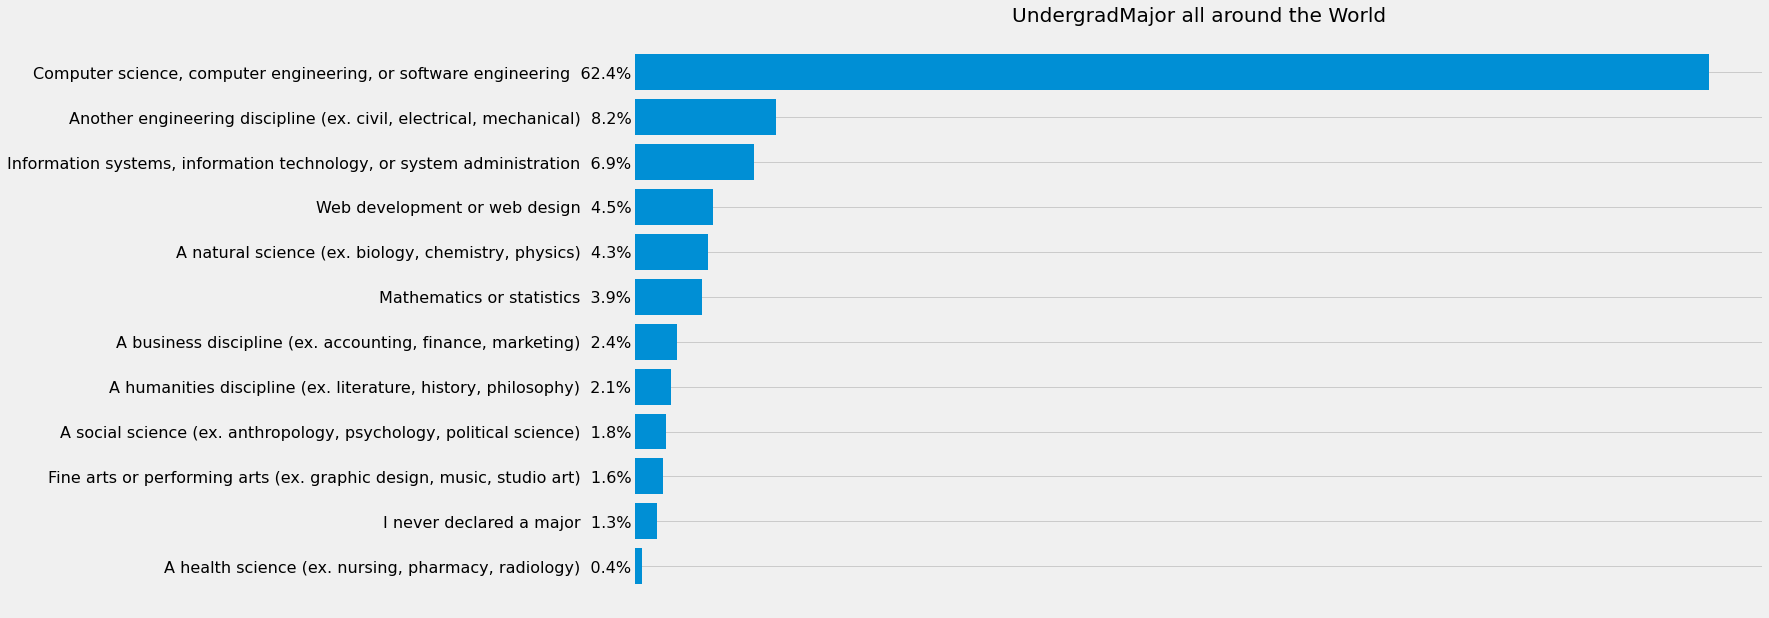

In [22]:
UndergradMajor = data ["UndergradMajor"]
UndergradMajor.dropna(inplace = True)

counted = Counter(UndergradMajor)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, UndergradMajor ,"fivethirtyeight", False , (18,10), "UndergradMajor all around the World")   # ვაგებთ გრაფიკს





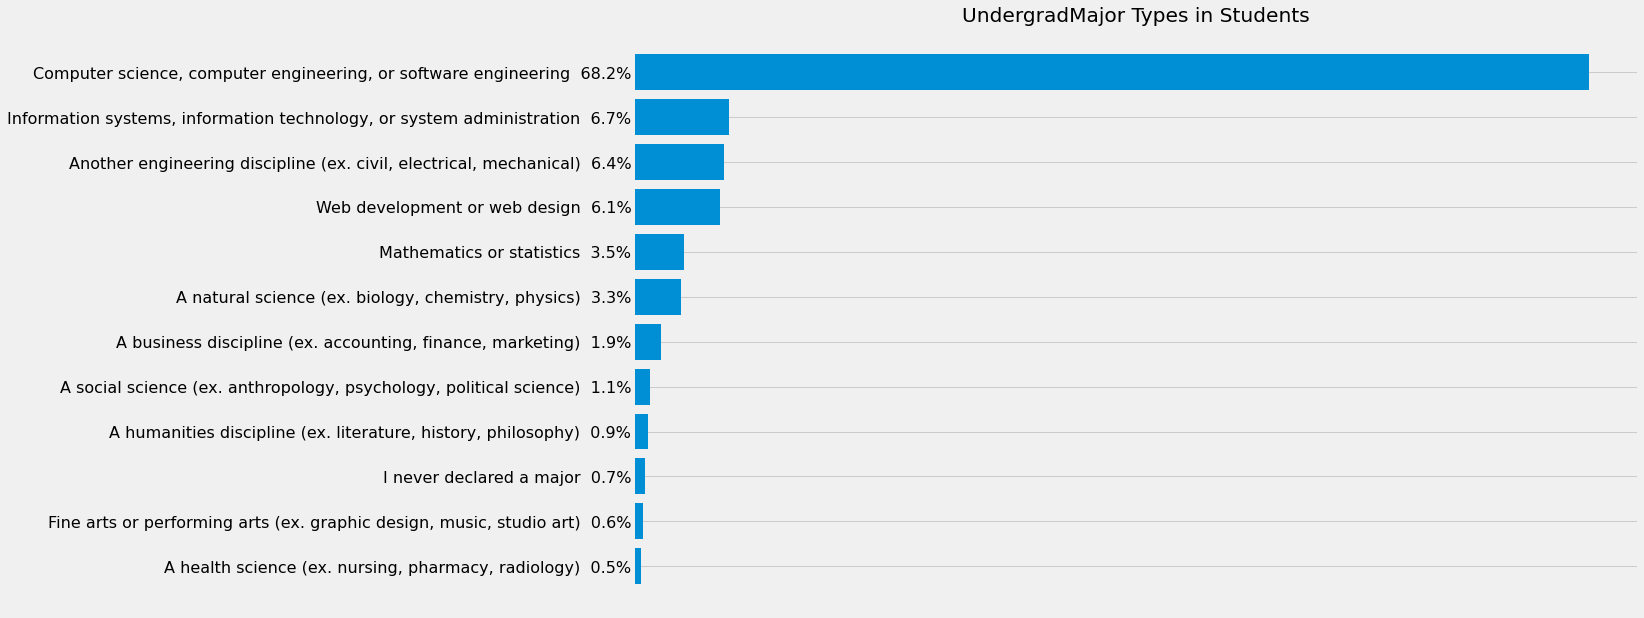

In [23]:
UndergradMajor_Filtered = data["UndergradMajor"]    ######## ვიძახებთ Ethnicity-ის
 
UndergradMajor_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

UndergradMajor =data[(UndergradMajor_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_UndergradMajor= UndergradMajor["UndergradMajor"]  # მიღებულ მონაცემებს ვინახავთ ახალ ცვლადში

New_UndergradMajor = New_UndergradMajor.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_UndergradMajor)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_UndergradMajor ,"fivethirtyeight", False , (16,10), "UndergradMajor Types in Students") # ვაგებთ გრაფიკს

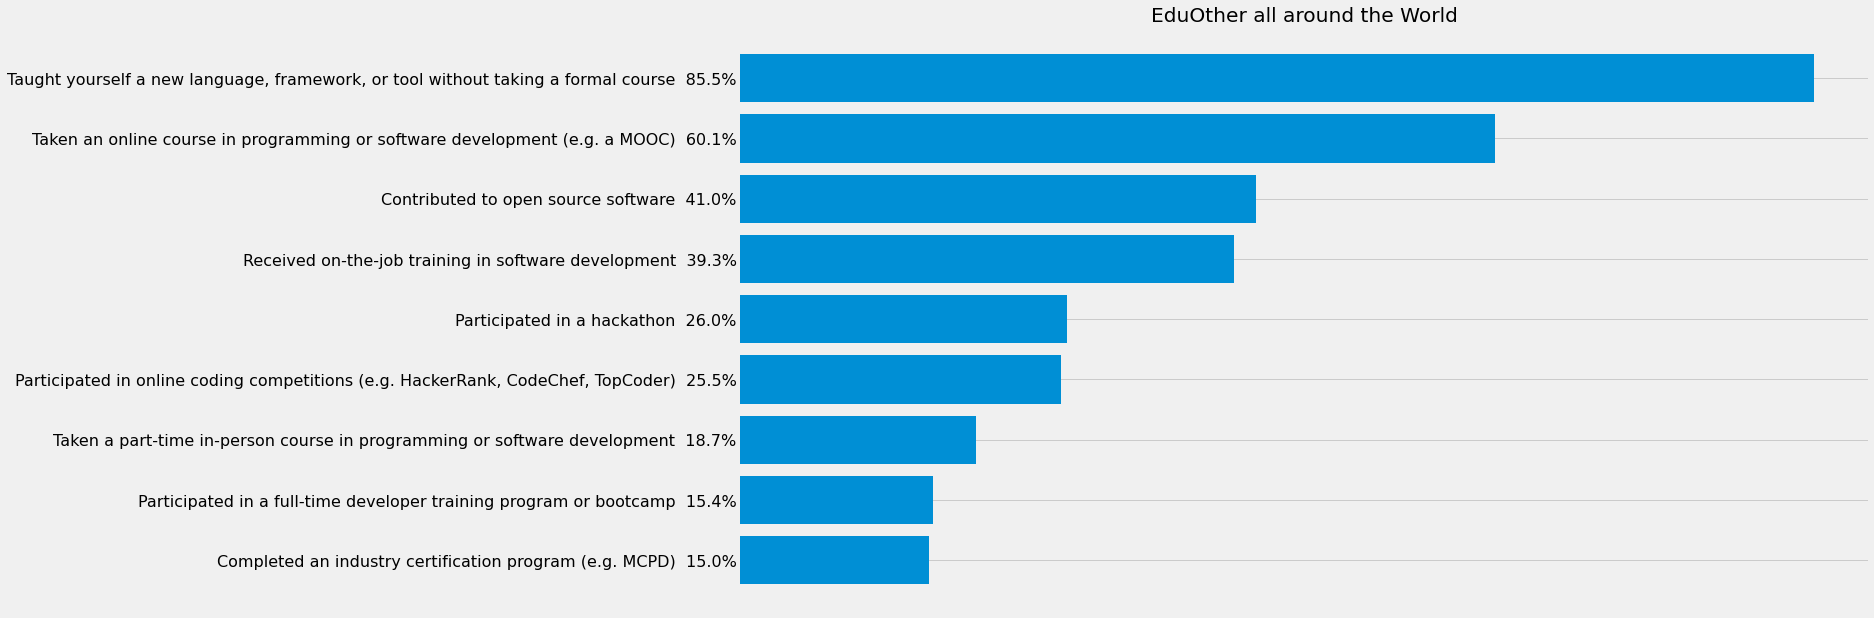

In [24]:
EduOther = data["EduOther"]
EduOther.dropna(inplace = True)
EduOther = EduOther.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(EduOther)   ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს


Build_Barh_sizes( key_Phrases , Quantity, EduOther ,"fivethirtyeight", False , (18,10), "EduOther all around the World")   # ვაგებთ გრაფიკს




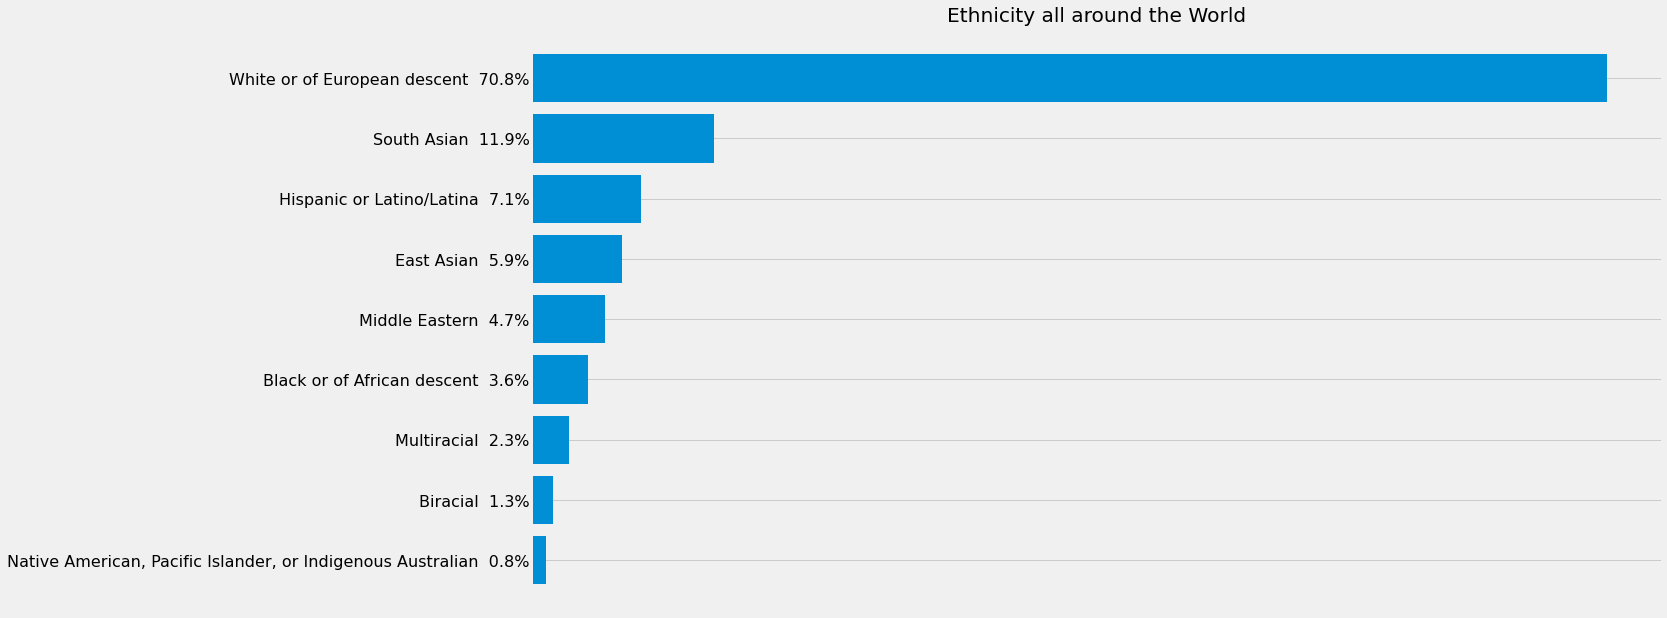

In [25]:
Ethnicity = data ["Ethnicity"]
Ethnicity.dropna(inplace = True)


Ethnicity = Ethnicity.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(Ethnicity)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს

Build_Barh_sizes( key_Phrases , Quantity, Ethnicity ,"fivethirtyeight", False , (18,10), "Ethnicity all around the World")   # ვაგებთ გრაფიკს


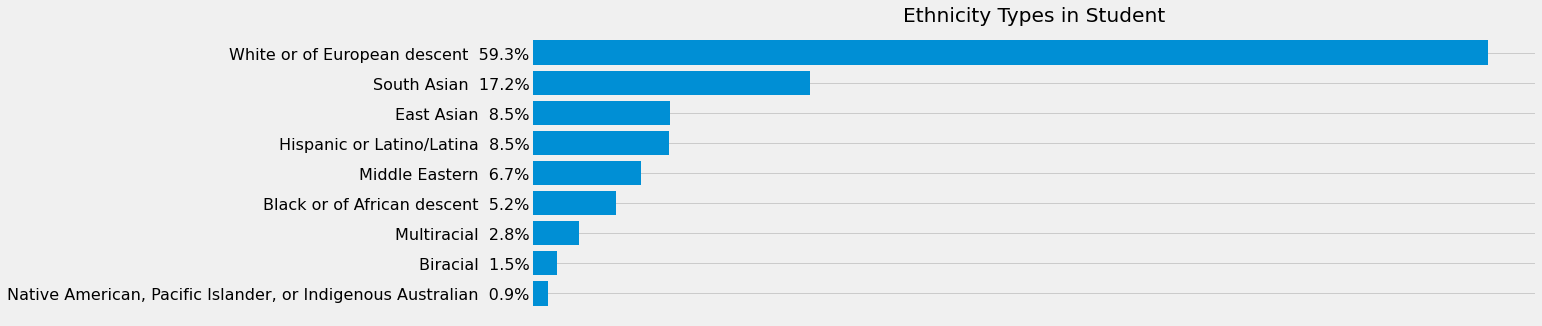

In [26]:
Ethnicity_Filtered = data["Ethnicity"]    ######## ვიძახებთ Ethnicity-ის
 
Ethnicity_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

Ethnicity =data[(Ethnicity_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_Ethnicity = Ethnicity["Ethnicity"]  # მიღებულ მონაცემებს ვინახავთ ახალ ცვლადში

New_Ethnicity = New_Ethnicity.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_Ethnicity)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_Ethnicity ,"fivethirtyeight", False , (16,5), "Ethnicity Types in Student") # ვაგებთ გრაფიკს



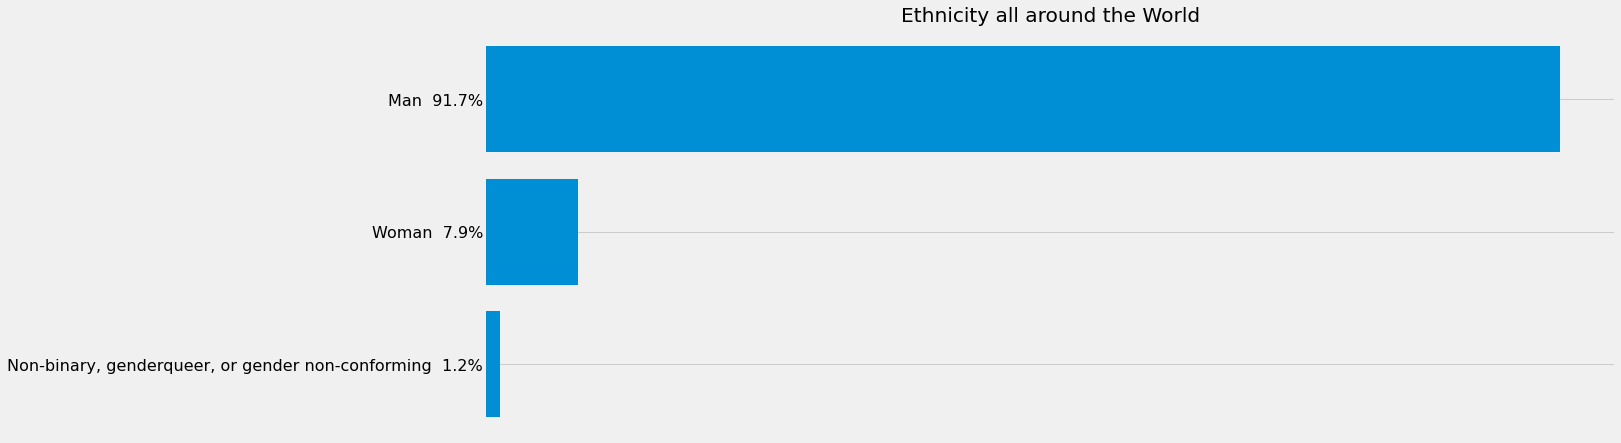

In [27]:
Gender = data["Gender"]
Gender.dropna(inplace=True)


Gender = Gender.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(Gender)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს

Build_Barh_sizes( key_Phrases , Quantity, Gender ,"fivethirtyeight", False , (18,7), "Ethnicity all around the World")   # ვაგებთ გრაფიკს



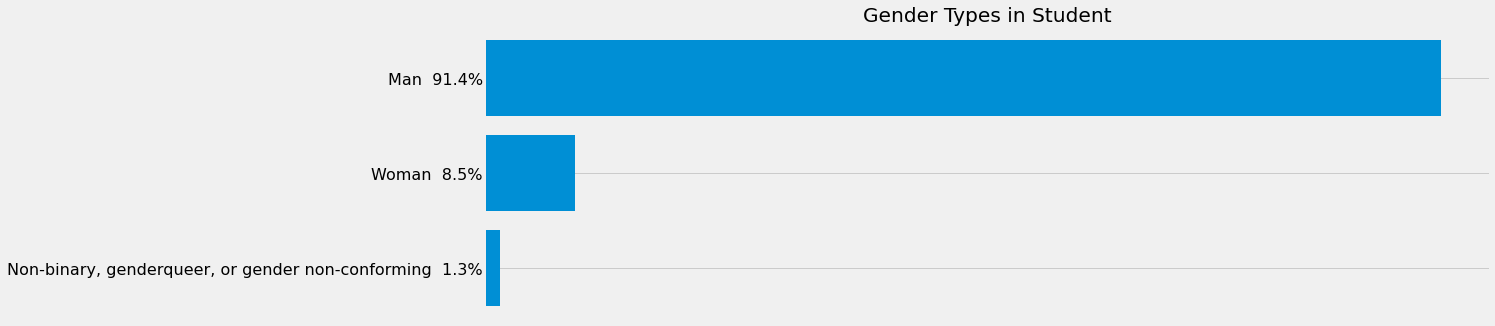

In [28]:
Gender_Filtered = data["Gender"]    # ვიძახებთ Gender-ს
 
Gender_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

Gender =data[(Gender_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_Gender = Gender["Gender"]  # ვინახავთ ახალ ცვლადში

New_Gender = New_Gender.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(New_Gender)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_Gender ,"fivethirtyeight", False , (16,5), "Gender Types in Student") # ვაგებთ გრაფიკს

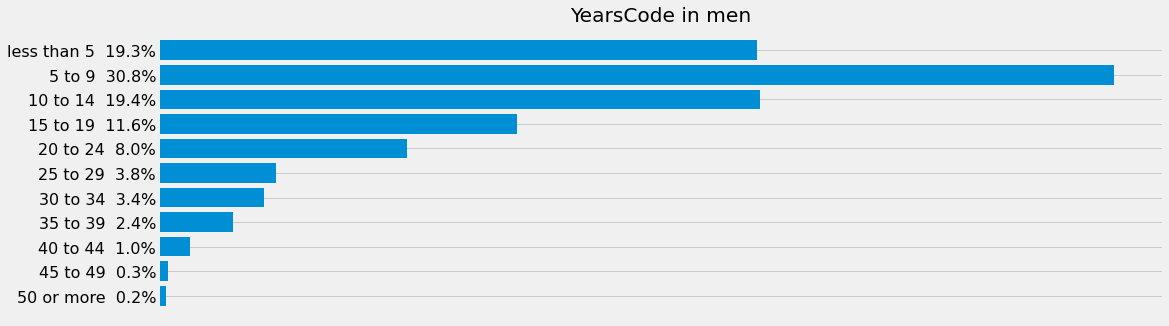

In [29]:
###### es davikidot cotaxans
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


man  = data[ (YearsCode != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
new_man = man["YearsCode"]

######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(new_man)
        


# ვაგებთ გრაფიკს
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_man ,"fivethirtyeight", False , (16,5), "YearsCode in men") 

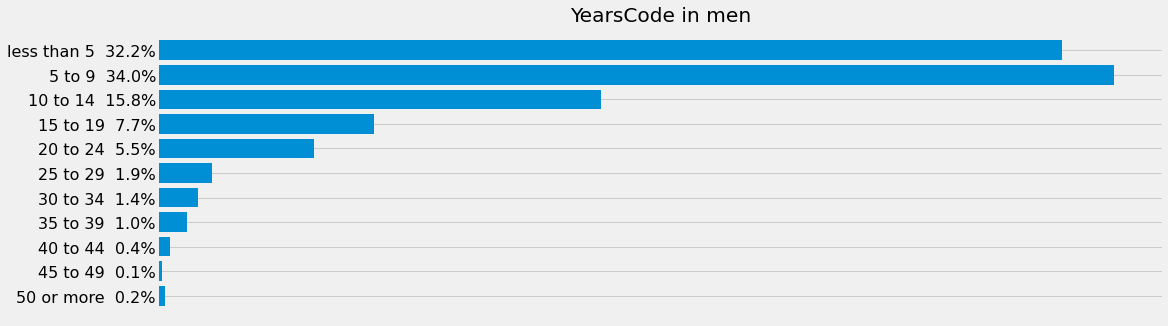

In [30]:
###### es davikidot cotaxans
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


woman  = data[ (YearsCode != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
new_woman = woman["YearsCode"]

######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(new_woman)
        


# ვაგებთ გრაფიკს
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_woman ,"fivethirtyeight", False , (16,5), "YearsCode in men") 

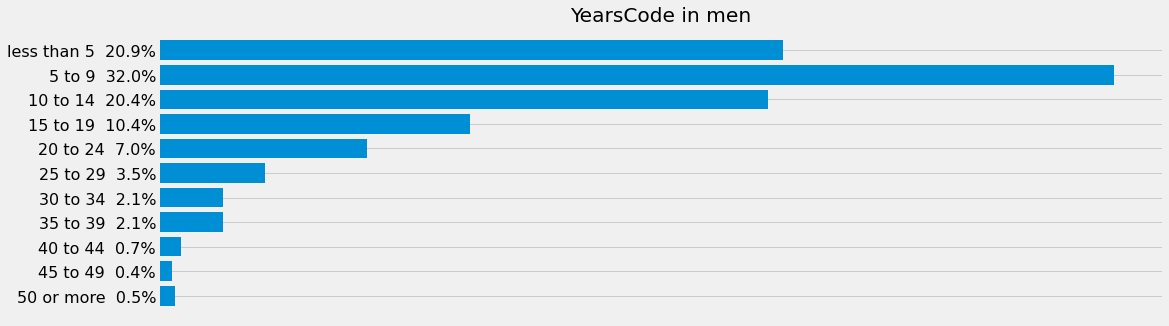

In [31]:
###### es davikidot cotaxans
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


LGBTQ  = data[ (YearsCode != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")  | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
new_LGBTQ = LGBTQ["YearsCode"]

######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(new_LGBTQ)
        


# ვაგებთ გრაფიკს
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_LGBTQ ,"fivethirtyeight", False , (16,5), "YearsCode in men") 



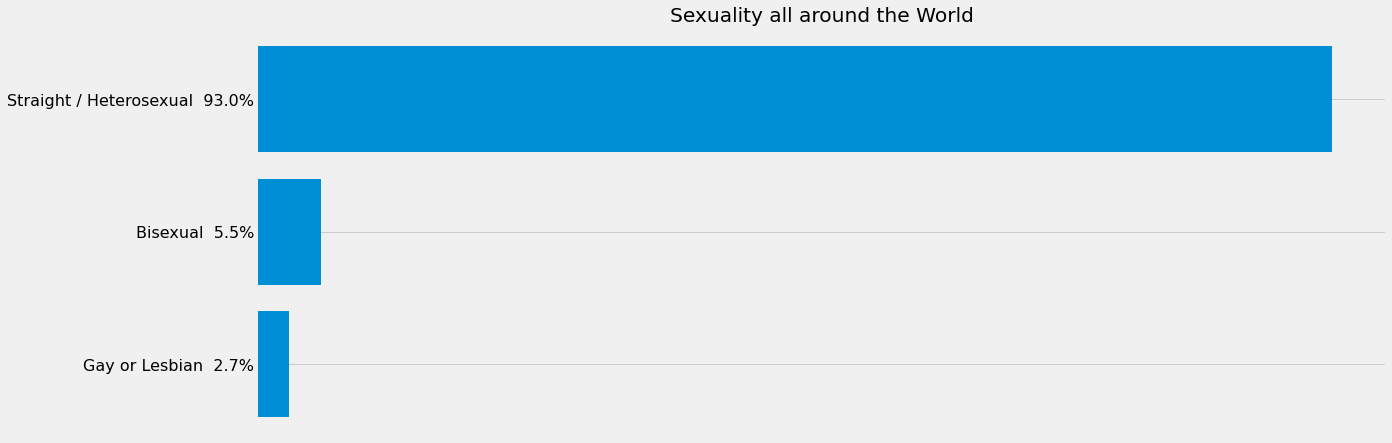

In [32]:
Sexuality = data["Sexuality"]
Sexuality.dropna(inplace = True)

Sexuality = Sexuality.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში
list_sorter_counter(Sexuality)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს


Build_Barh_sizes( key_Phrases , Quantity, Sexuality ,"fivethirtyeight", False , (18,7), "Sexuality all around the World")   # ვაგებთ გრაფიკს




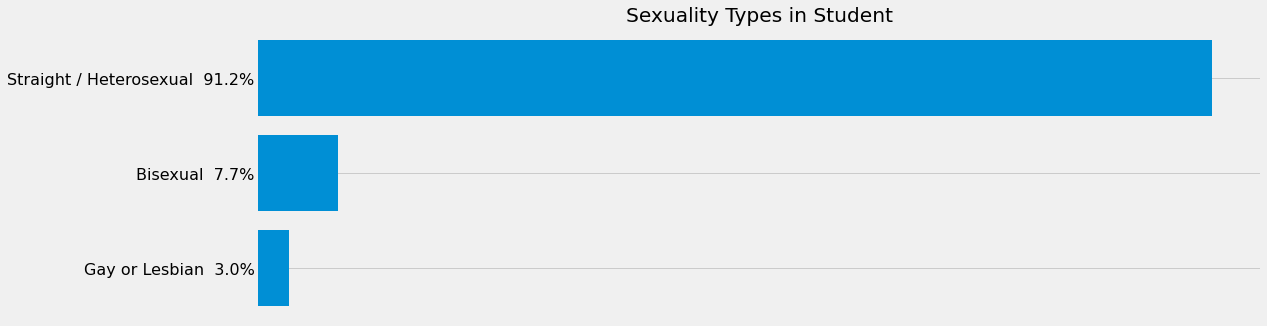

In [33]:
Sexuality_Filtered = data["Sexuality"]    # ვიძახებთ Gender-ს
 
Sexuality_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

Sexuality =data[(Sexuality_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_Sexuality = Sexuality["Sexuality"]  # ვინახავთ ახალ ცვლადში

New_Sexuality = New_Sexuality.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(New_Sexuality)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_Sexuality ,"fivethirtyeight", False , (16,5), "Sexuality Types in Student") # ვაგებთ გრაფიკს

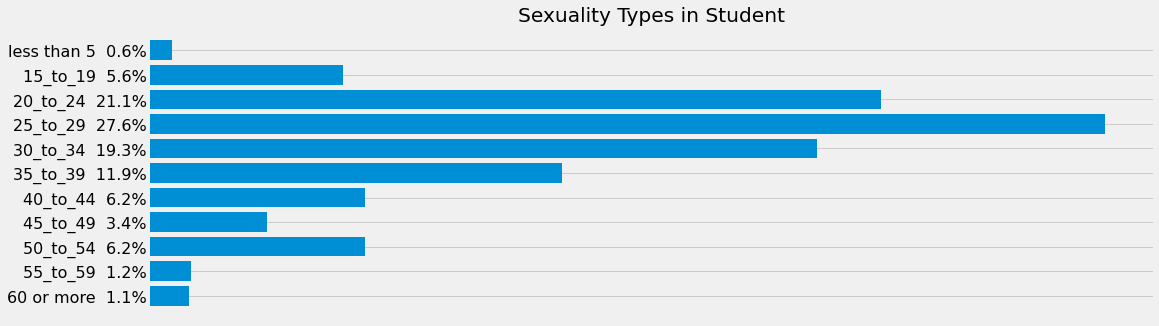

In [34]:
#################### Disability Status-ი არ იყო, ამიტომაც გადავედი ასაკზე #########
Age = data["Age"]
Age.dropna(inplace = True)


year_15_to_60(Age)

Build_Barh_sizes( Phrases_15_to_60 , quantity_15_to_60, Age ,"fivethirtyeight", False , (16,5), "Sexuality Types in Student") # ვაგებთ გრაფიკს

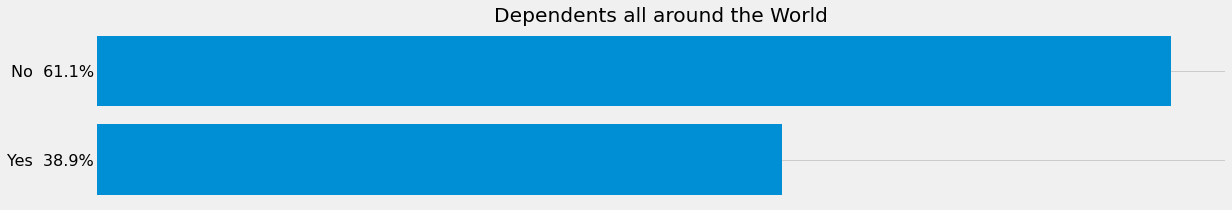

In [35]:
Dependents = data["Dependents"]
Dependents.dropna( inplace = True)

counted = Counter(Dependents)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, Dependents ,"fivethirtyeight", False , (18,3), "Dependents all around the World")   # ვაგებთ გრაფიკს



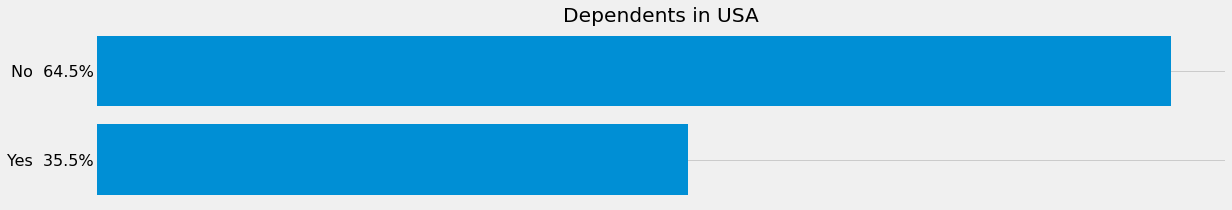

In [36]:
Dependents_USA = data["Dependents"]

Dependents_USA.dropna(inplace = True)

Dependents = data[(Dependents_USA!= "NaN") & (data["Country"] == "United States")]  


New_Dependents= Dependents["Dependents"]

counted = Counter(New_Dependents)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Dependents ,"fivethirtyeight", False , (18,3), "Dependents in USA")   # ვაგებთ გრაფიკს

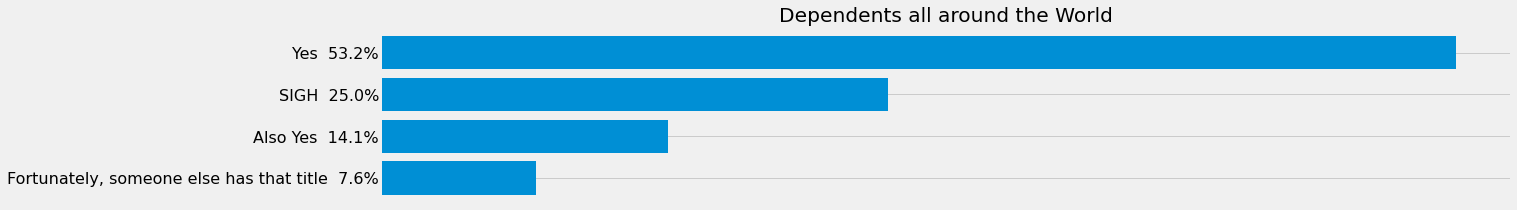

In [37]:
ITperson = data["ITperson"]
ITperson.dropna(inplace = True)

counted = Counter(ITperson)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, ITperson ,"fivethirtyeight", False , (18,3), "Dependents all around the World")   # ვაგებთ გრაფიკს

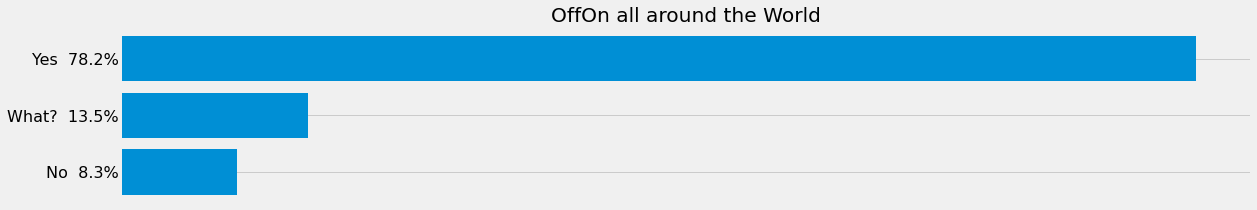

In [38]:
OffOn = data["OffOn"]
OffOn.dropna(inplace = True)

counted = Counter(OffOn)  # ვითვლით OffOn-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, OffOn ,"fivethirtyeight", False , (18,3), "OffOn all around the World")   # ვაგებთ გრაფიკს

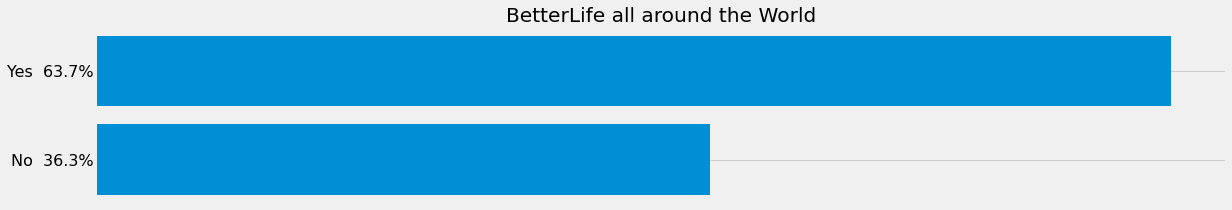

In [39]:
BetterLife = data["BetterLife"]
BetterLife.dropna(inplace = True)

counted = Counter(BetterLife)  # ვითვლით BetterLife-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, BetterLife ,"fivethirtyeight", False , (18,3), "BetterLife all around the World")   # ვაგებთ გრაფიკს


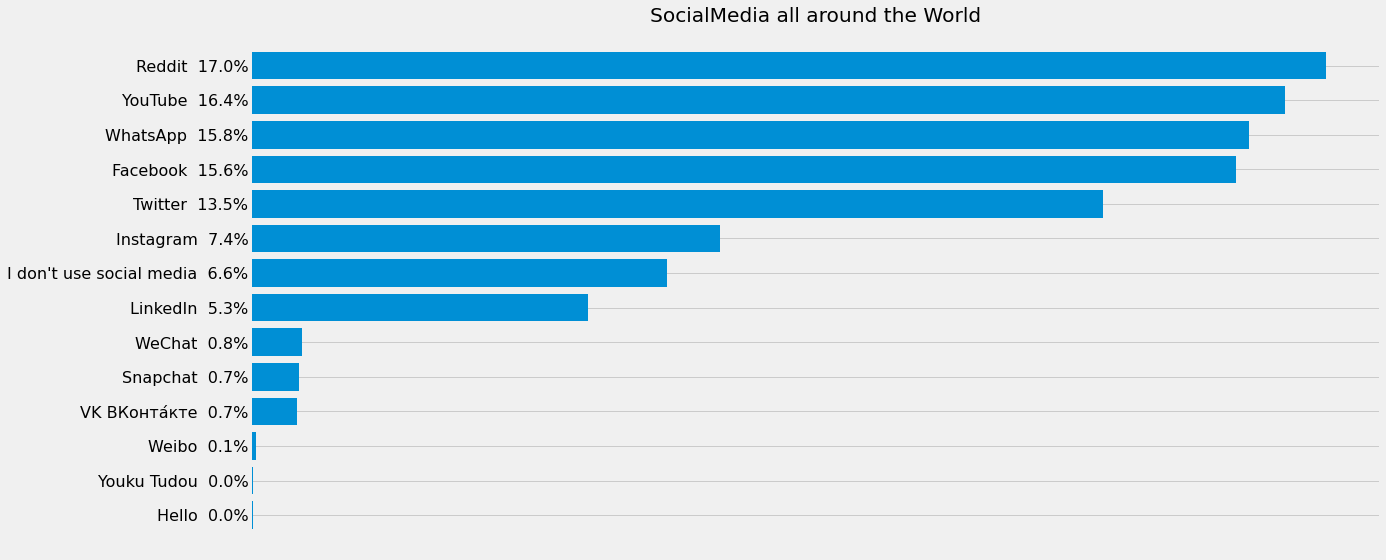

In [40]:
SocialMedia = data["SocialMedia"]
SocialMedia.dropna(inplace = True)

counted = Counter(SocialMedia)  # ვითვლით SocialMedia-ების პასუხებს

########### ვცვლით დიქშენერის ელემენტებს ###############
counted["Youku Tudou"] = counted["Youku Tudou 优酷"] 
del counted["Youku Tudou 优酷"]

counted["WeChat"] = counted["WeChat 微信"] 
del counted["WeChat 微信"]

counted["Weibo"] = counted["Weibo 新浪微博"] 
del counted["Weibo 新浪微博"]


Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, SocialMedia ,"fivethirtyeight", False , (18,9), "SocialMedia all around the World")   # ვაგებთ გრაფიკს

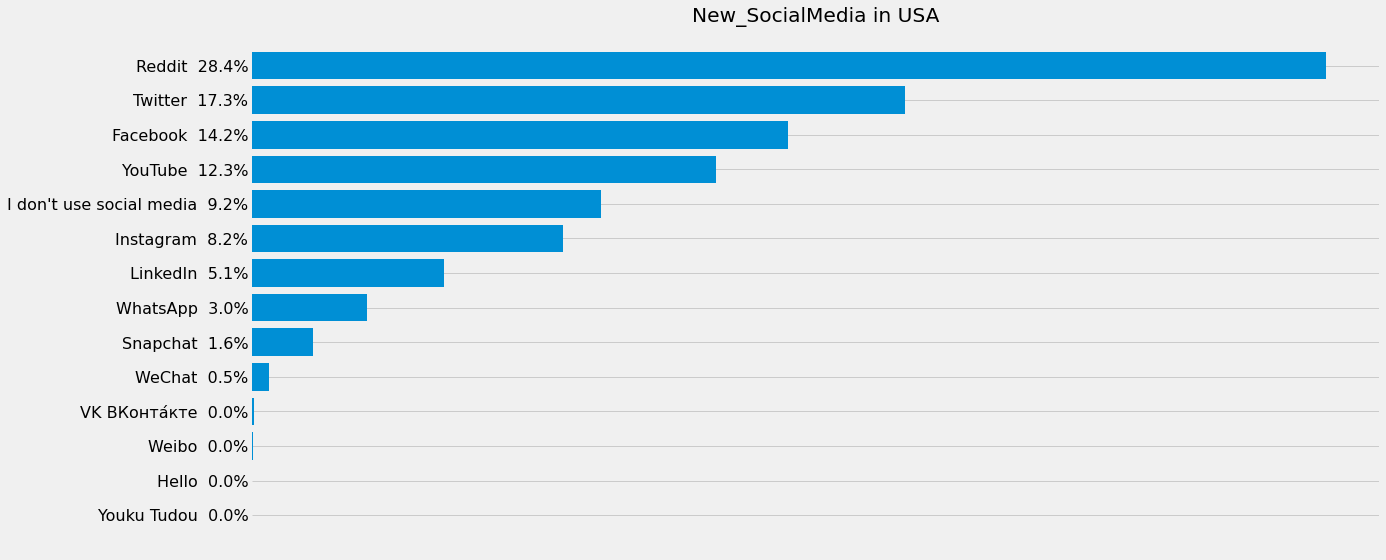

In [41]:
SocialMedia_USA = data["SocialMedia"]

SocialMedia_USA.dropna(inplace = True)

SocialMedia = data[(SocialMedia_USA!= "NaN") & (data["Country"] == "United States")]  


New_SocialMedia= SocialMedia["SocialMedia"]

counted = Counter(New_SocialMedia)  

########### ვცვლით დიქშენერის ელემენტებს ###############
counted["Youku Tudou"] = counted["Youku Tudou 优酷"] 
del counted["Youku Tudou 优酷"]

counted["WeChat"] = counted["WeChat 微信"] 
del counted["WeChat 微信"]

counted["Weibo"] = counted["Weibo 新浪微博"] 
del counted["Weibo 新浪微博"]

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_SocialMedia ,"fivethirtyeight", False , (18,9), "New_SocialMedia in USA")   # ვაგებთ გრაფიკს

In [42]:
############  what is your handle - ar aris saertod #################

############  IRL or online chat? - arc es ar aris #########

########### What Individual Person Will Have the Most Influence In Tech This Year? - არც ესსსსს :(((((((((((((( ##########

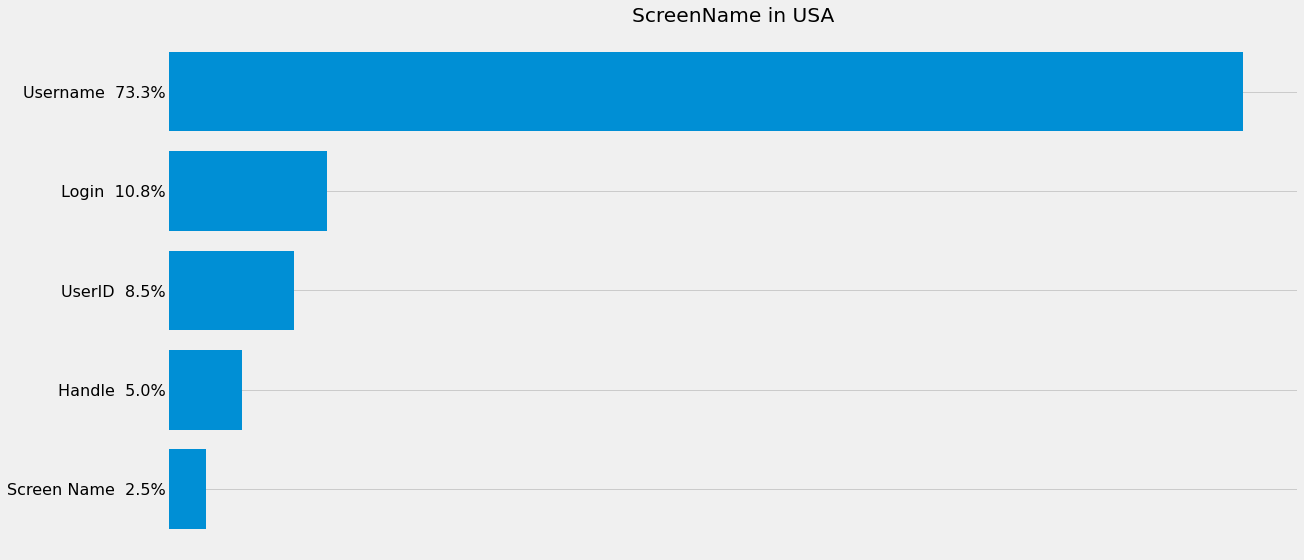

In [43]:
ScreenName = data[ "ScreenName"]
ScreenName.dropna(inplace = True)

counted = Counter(ScreenName)  # ვითვლით ScreenName-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, ScreenName ,"fivethirtyeight", False , (18,9), "ScreenName in USA")   # ვაგებთ გრაფიკს

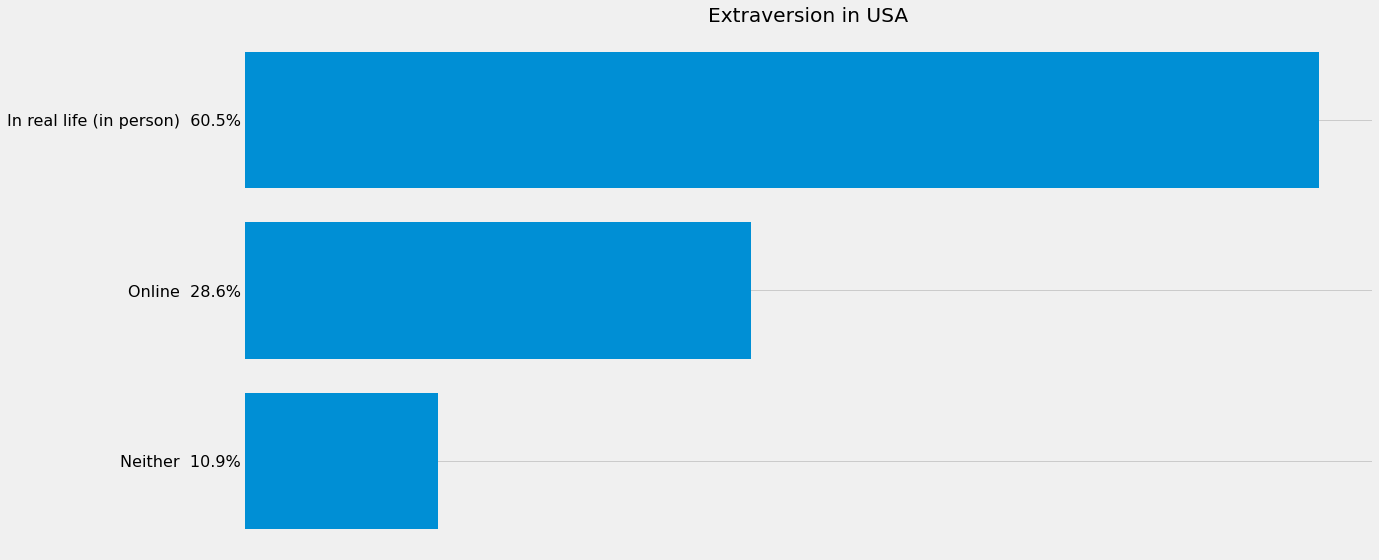

In [44]:
Extraversion = data["Extraversion"]
Extraversion.dropna(inplace = True)

counted = Counter(Extraversion)  # ვითვლით ScreenName-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Extraversion ,"fivethirtyeight", False , (18,9), "Extraversion in USA")   # ვაგებთ გრაფიკს

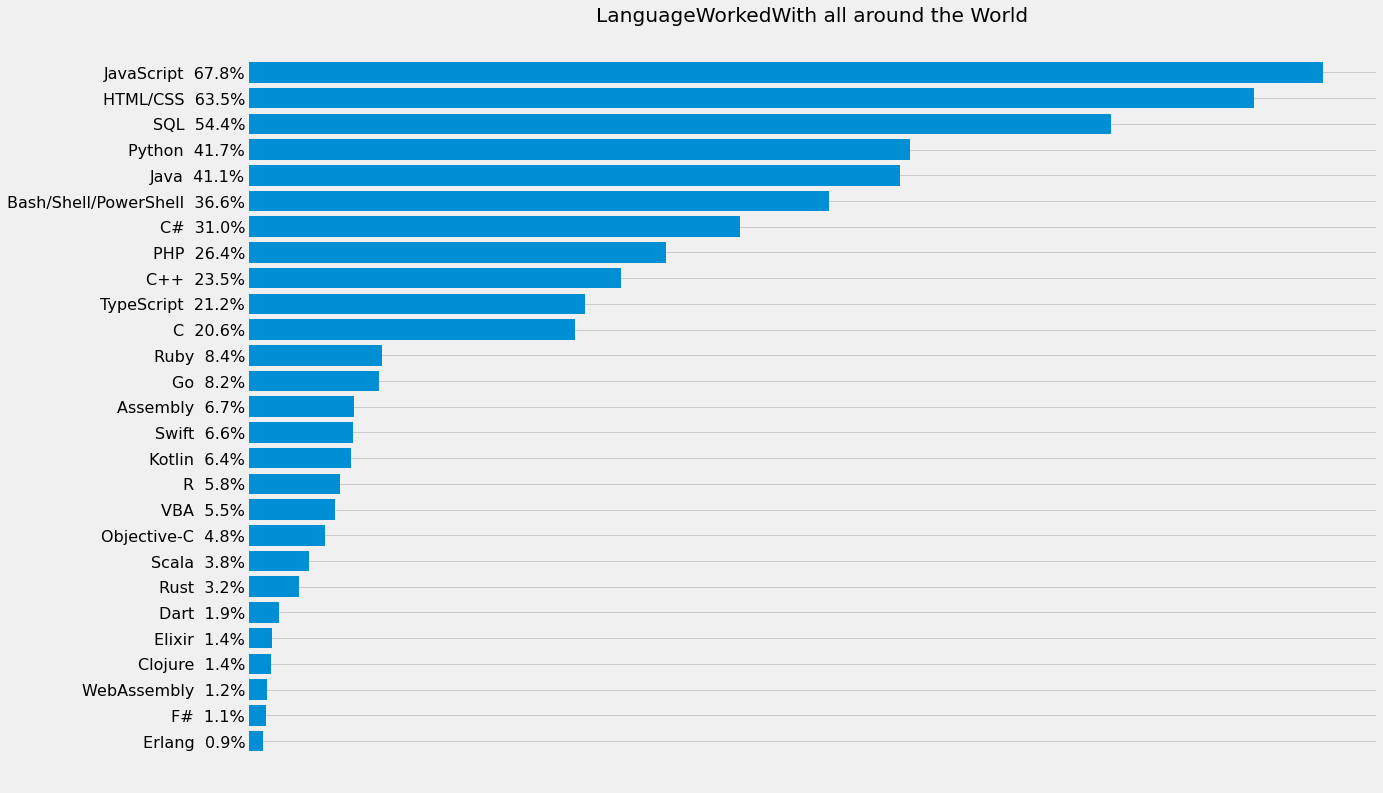

In [45]:

LanguageWorkedWith = data ["LanguageWorkedWith"]
LanguageWorkedWith.dropna(inplace = True)

LanguageWorkedWith_no_others = []  #### ვქმნით ცარიელ სიას სადაც ვამატებთ ელემენტებს other-ების გარეშე (ცალკე მდომი other-ების გარეშე)


#### ამით ვამატებს LanguageWorkedWith_no_others- ის სიაში იმ ელემენტებს, სადაც არ არის ცალკე მდგომი other-ები.
for i in LanguageWorkedWith:
    if i == "Other(s):":
        a=6
    else:
        LanguageWorkedWith_no_others.append(i.split(";"))

union = [] #### ამ სიაში უნდა დავამატოთ other- ებისგან მთლიანად გაფილტრული ელემენტები

##### ვფილტრავთ მთელ სიას other- ებისგან (სხვა პასუხებთან ერთად მდგომი other- ებისგან)
for i in LanguageWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


counted = Counter(union)  ####### დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება

counted = sort_dict_by_value(counted, False)  ######## ალაგებს ელემენტებს რაოდენობების მიხედვით

key_Phrases = []  ######## ვქმნით ფრაზების შესანახ სიას
Quantity = []  ###### ვქმნით რაოდენობების შესანახ სიას

items = counted.items()  ########## დიქშენერის გარდაქმნის სიად

############ ალაგებს ფრაზებს და შესაბამის რაოდენობებს ცალ- ცალკე სიაში ##########
for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, LanguageWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "LanguageWorkedWith all around the World")   # ვაგებთ გრაფიკს


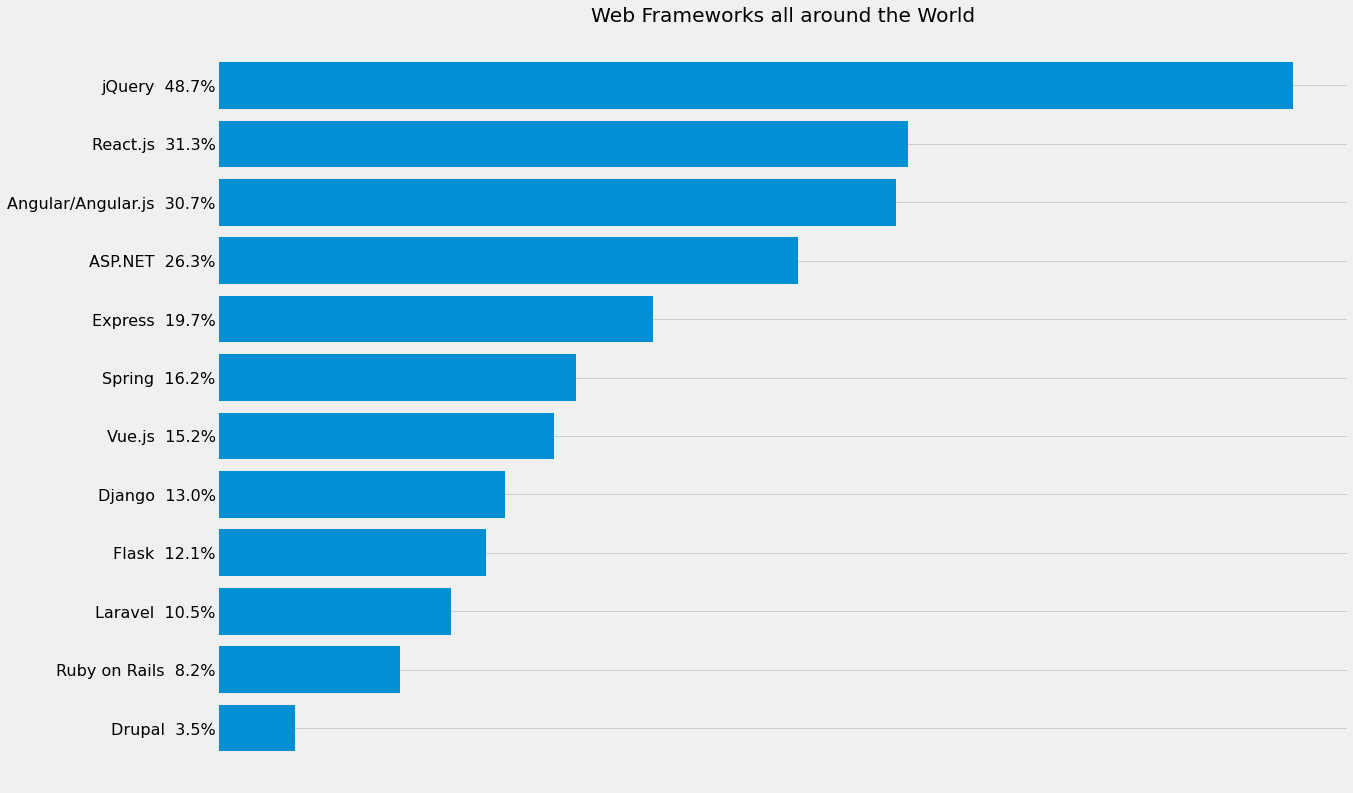

In [46]:
WebFrameWorkedWith = data ["WebFrameWorkedWith"]
WebFrameWorkedWith.dropna(inplace = True)

WebFrameWorkedWith_no_others = []   #### ვქმნით ცარიელ სიას სადაც ვამატებთ ელემენტებს other-ების გარეშე (ცალკე მდომი other-ების გარეშე)


#### ამით ვამატებს LanguageWorkedWith_no_others- ის სიაში იმ ელემენტებს, სადაც არ არის ცალკე მდგომი other-ები.
for i in WebFrameWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       WebFrameWorkedWith_no_others.append(i.split(";"))

union = []     #### ამ სიაში უნდა დავამატოთ other- ებისგან მთლიანად გაფილტრული ელემენტები

##### ვფილტრავთ მთელ სიას other- ებისგან (სხვა პასუხებთან ერთად მდგომი other- ებისგან)
for i in WebFrameWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


counted = Counter(union)     ####### დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება

counted = sort_dict_by_value(counted, False)      ######## ალაგებს ელემენტებს რაოდენობების მიხედვით

key_Phrases = []       ######## ვქმნით ფრაზების შესანახ სიას
Quantity = []          ###### ვქმნით რაოდენობების შესანახ სიას


items = counted.items()      ########## დიქშენერის გარდაქმნის სიად


############ ალაგებს ფრაზებს და შესაბამის რაოდენობებს ცალ- ცალკე სიაში ##########
for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, WebFrameWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Web Frameworks all around the World")   # ვაგებთ გრაფიკს


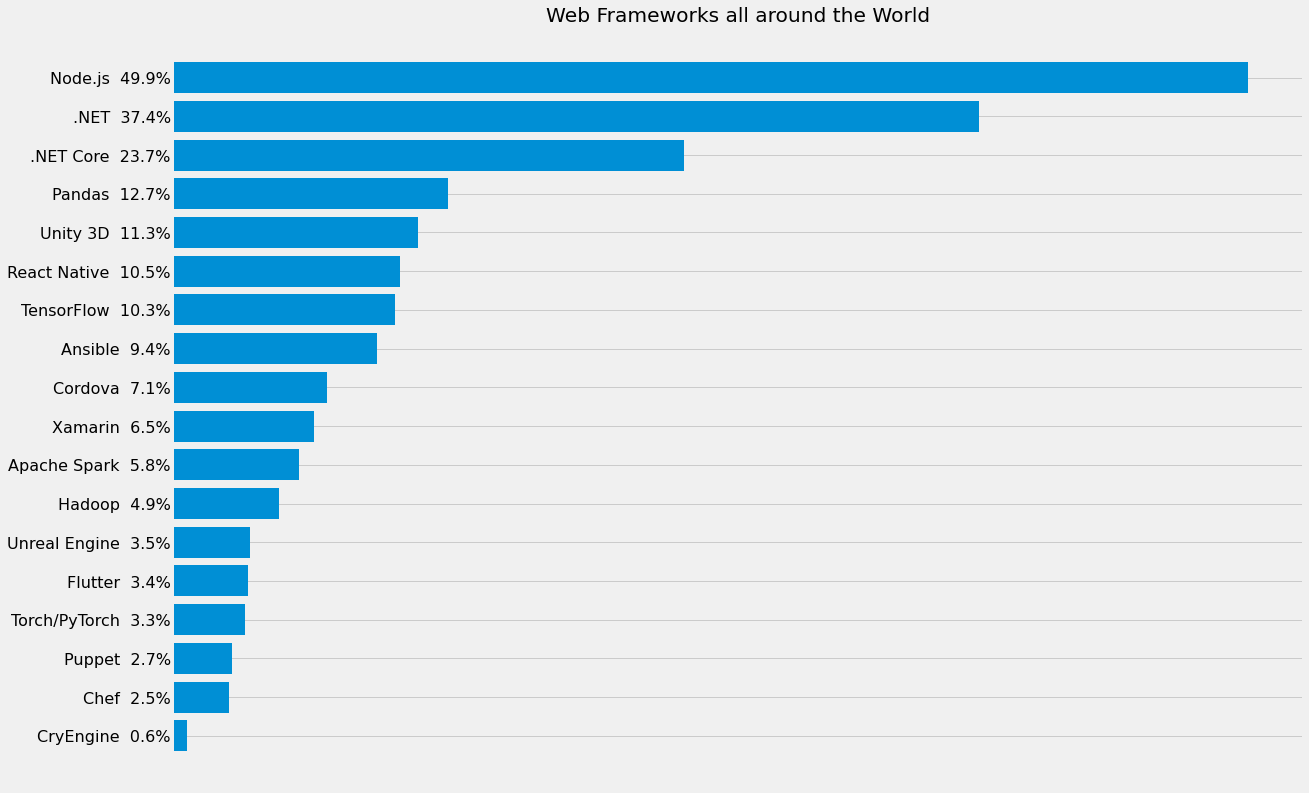

In [47]:
MiscTechWorkedWith = data ["MiscTechWorkedWith"]
MiscTechWorkedWith.dropna(inplace = True)


MiscTechWorkedWith_no_others = []   #### ვქმნით ცარიელ სიას სადაც ვამატებთ ელემენტებს other-ების გარეშე (ცალკე მდომი other-ების გარეშე)


#### ამით ვამატებს LanguageWorkedWith_no_others- ის სიაში იმ ელემენტებს, სადაც არ არის ცალკე მდგომი other-ები.
for i in MiscTechWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       MiscTechWorkedWith_no_others.append(i.split(";"))

union = []     #### ამ სიაში უნდა დავამატოთ other- ებისგან მთლიანად გაფილტრული ელემენტები

##### ვფილტრავთ მთელ სიას other- ებისგან (სხვა პასუხებთან ერთად მდგომი other- ებისგან)
for i in MiscTechWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


counted = Counter(union)     ####### დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება

counted = sort_dict_by_value(counted, False)      ######## ალაგებს ელემენტებს რაოდენობების მიხედვით

key_Phrases = []       ######## ვქმნით ფრაზების შესანახ სიას
Quantity = []          ###### ვქმნით რაოდენობების შესანახ სიას


items = counted.items()      ########## დიქშენერის გარდაქმნის სიად


############ ალაგებს ფრაზებს და შესაბამის რაოდენობებს ცალ- ცალკე სიაში ##########
for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, MiscTechWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Web Frameworks all around the World")   # ვაგებთ გრაფიკს


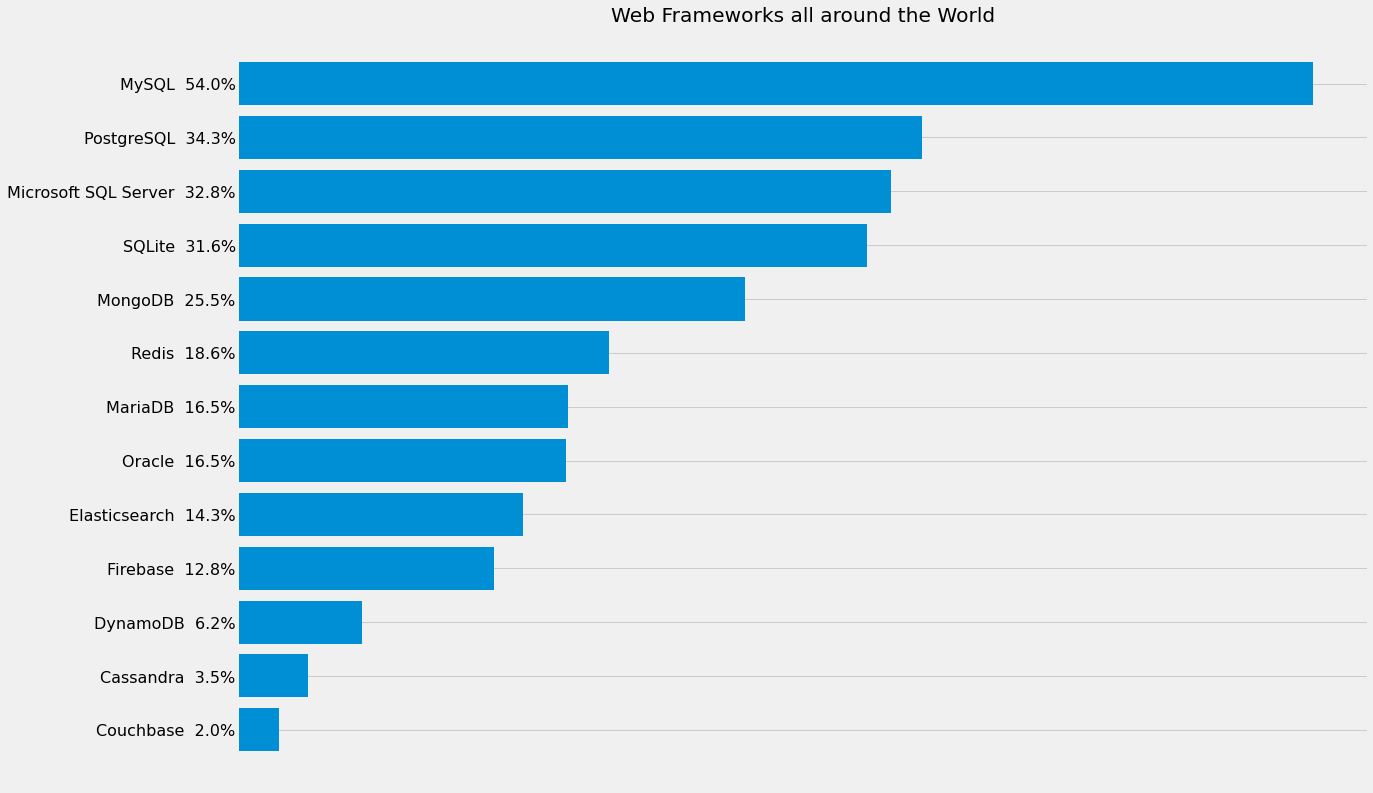

In [48]:
DatabaseWorkedWith = data ["DatabaseWorkedWith"]
DatabaseWorkedWith.dropna(inplace = True)

DatabaseWorkedWith_no_others = []   #### ვქმნით ცარიელ სიას სადაც ვამატებთ ელემენტებს other-ების გარეშე (ცალკე მდომი other-ების გარეშე)


#### ამით ვამატებს LanguageWorkedWith_no_others- ის სიაში იმ ელემენტებს, სადაც არ არის ცალკე მდგომი other-ები.
for i in DatabaseWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       DatabaseWorkedWith_no_others.append(i.split(";"))

union = []     #### ამ სიაში უნდა დავამატოთ other- ებისგან მთლიანად გაფილტრული ელემენტები

##### ვფილტრავთ მთელ სიას other- ებისგან (სხვა პასუხებთან ერთად მდგომი other- ებისგან)
for i in DatabaseWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


counted = Counter(union)     ####### დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება

counted = sort_dict_by_value(counted, False)      ######## ალაგებს ელემენტებს რაოდენობების მიხედვით

key_Phrases = []       ######## ვქმნით ფრაზების შესანახ სიას
Quantity = []          ###### ვქმნით რაოდენობების შესანახ სიას


items = counted.items()      ########## დიქშენერის გარდაქმნის სიად


############ ალაგებს ფრაზებს და შესაბამის რაოდენობებს ცალ- ცალკე სიაში ##########
for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, DatabaseWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Web Frameworks all around the World")   # ვაგებთ გრაფიკს


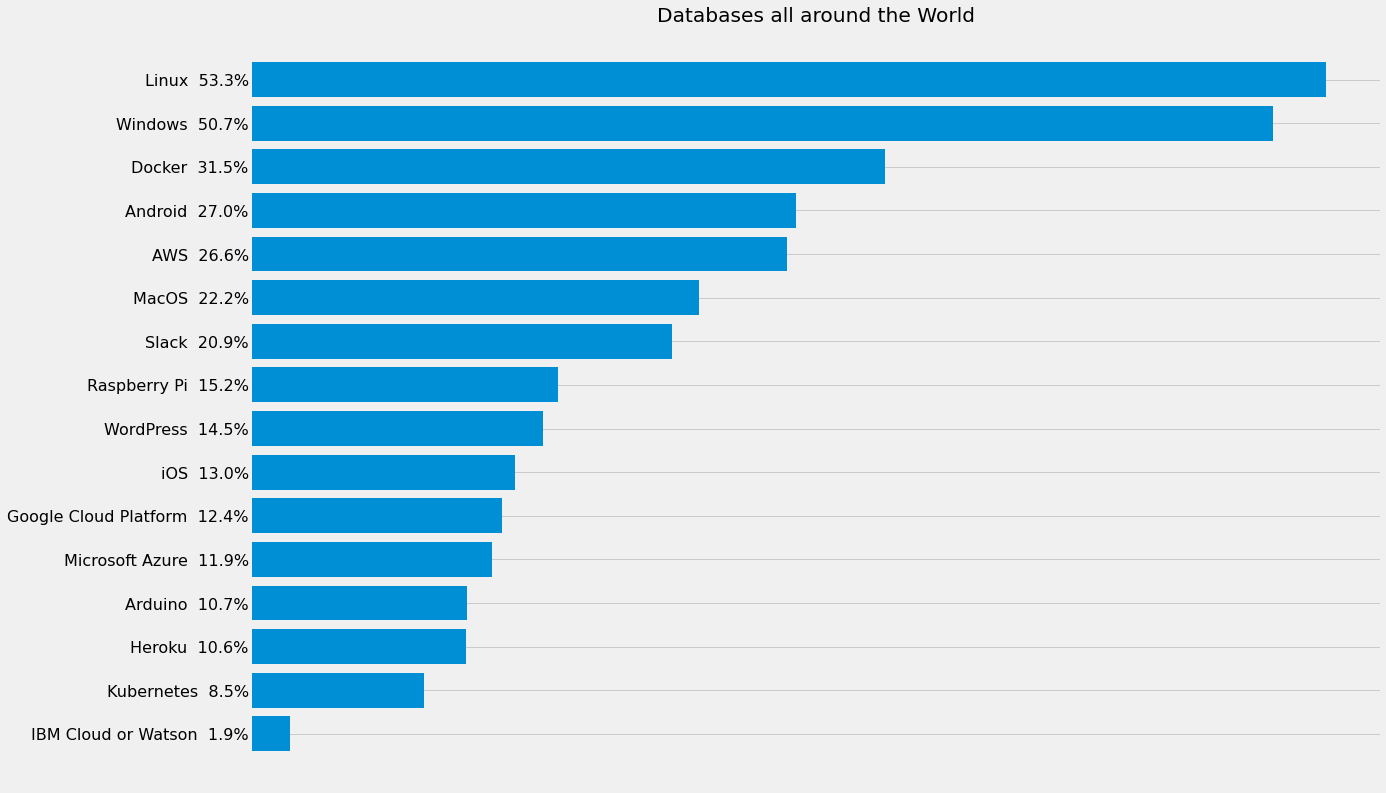

In [49]:
PlatformWorkedWith = data["PlatformWorkedWith"]
PlatformWorkedWith.dropna(inplace = True)

PlatformWorkedWith_no_others = []   #### ვქმნით ცარიელ სიას სადაც ვამატებთ ელემენტებს other-ების გარეშე (ცალკე მდომი other-ების გარეშე)


#### ამით ვამატებს LanguageWorkedWith_no_others- ის სიაში იმ ელემენტებს, სადაც არ არის ცალკე მდგომი other-ები.
for i in PlatformWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       PlatformWorkedWith_no_others.append(i.split(";"))

union = []     #### ამ სიაში უნდა დავამატოთ other- ებისგან მთლიანად გაფილტრული ელემენტები

##### ვფილტრავთ მთელ სიას other- ებისგან (სხვა პასუხებთან ერთად მდგომი other- ებისგან)
for i in PlatformWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


counted = Counter(union)     ####### დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება

counted = sort_dict_by_value(counted, False)      ######## ალაგებს ელემენტებს რაოდენობების მიხედვით

key_Phrases = []       ######## ვქმნით ფრაზების შესანახ სიას
Quantity = []          ###### ვქმნით რაოდენობების შესანახ სიას


items = counted.items()      ########## დიქშენერის გარდაქმნის სიად


############ ალაგებს ფრაზებს და შესაბამის რაოდენობებს ცალ- ცალკე სიაში ##########
for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, PlatformWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Databases all around the World")   # ვაგებთ გრაფიკს


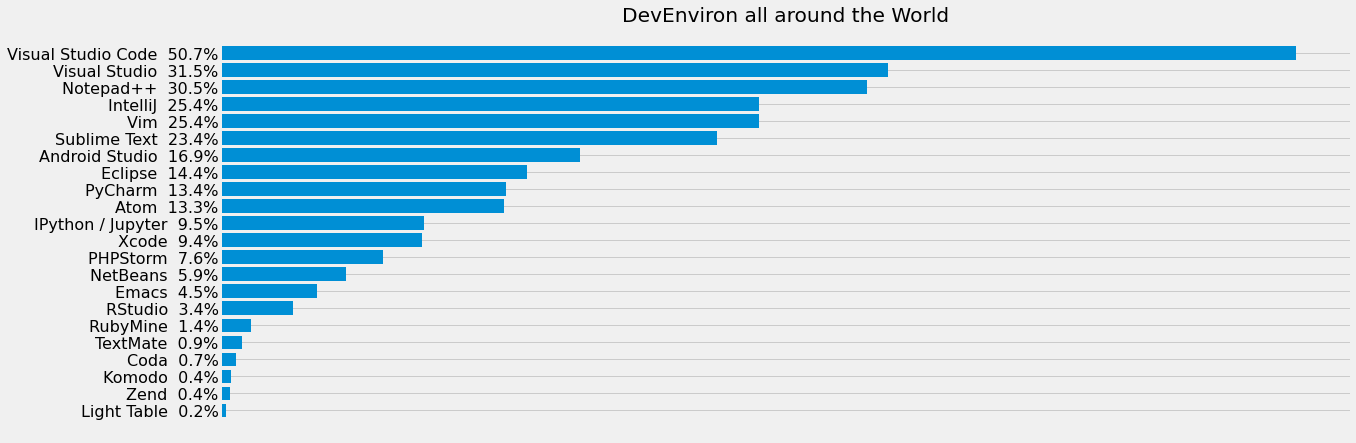

In [50]:
DevEnviron = data["DevEnviron"]
DevEnviron.dropna(inplace = True)

DevEnviron = DevEnviron.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში
list_sorter_counter(DevEnviron)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს

Build_Barh_sizes( key_Phrases , Quantity, DevEnviron ,"fivethirtyeight", False , (18,7), "DevEnviron all around the World")   # ვაგებთ გრაფიკს


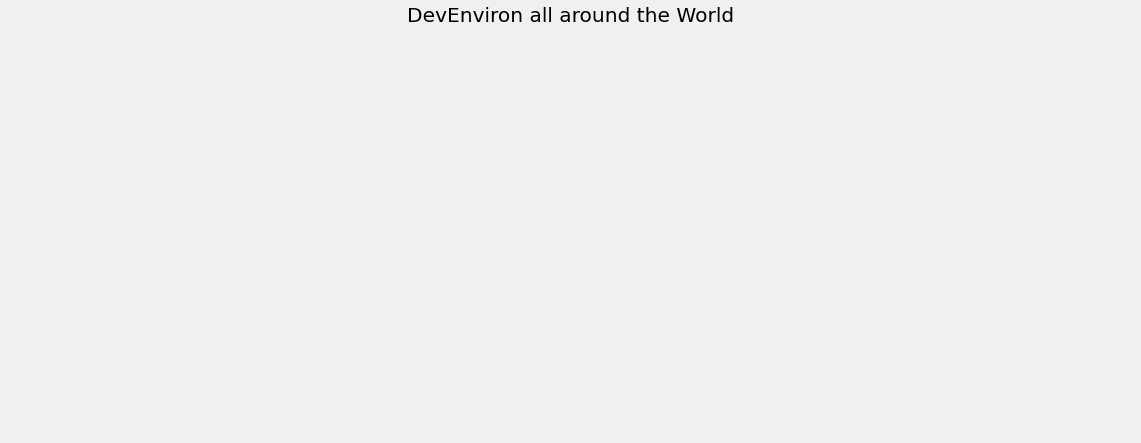

In [77]:
DevType = data["DevType"]
DevEnviron_Mobile = data["DevEnviron"]

DevEnviron_Mobile.dropna(inplace = True)

DevEnviron = data[(DevEnviron_Mobile!= "NaN") & (data["DevType"] == "mobile")]  


New_DevEnviron = DevEnviron["DevEnviron"]

counted = Counter(New_DevEnviron)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_DevEnviron ,"fivethirtyeight", False , (18,7), "DevEnviron all around the World")   # ვაგებთ გრაფიკს


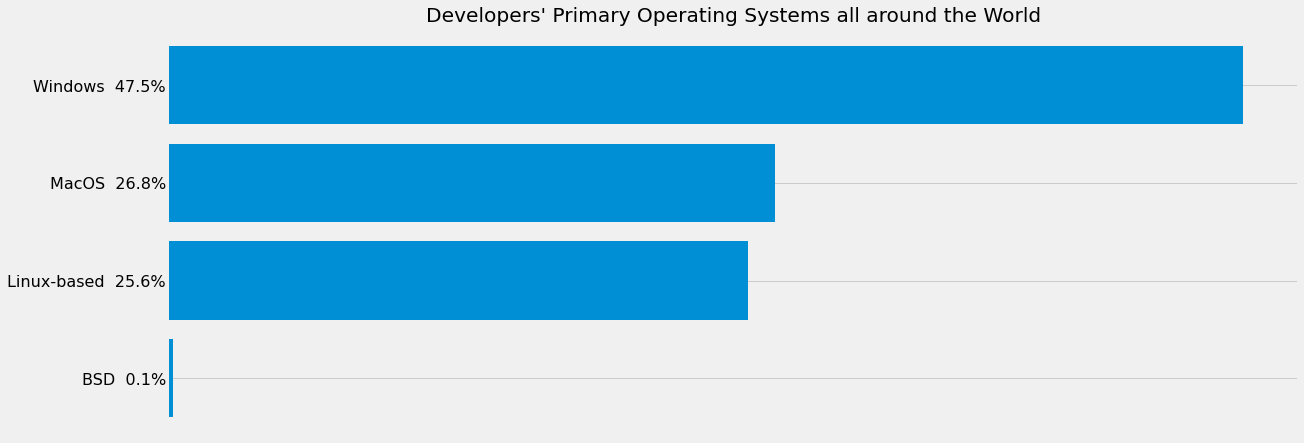

In [52]:
OpSys = data ["OpSys"]
OpSys.dropna(inplace = True)

counted = Counter(OpSys)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, OpSys ,"fivethirtyeight", False , (18,7), "Developers' Primary Operating Systems all around the World")   # ვაგებთ გრაფიკს





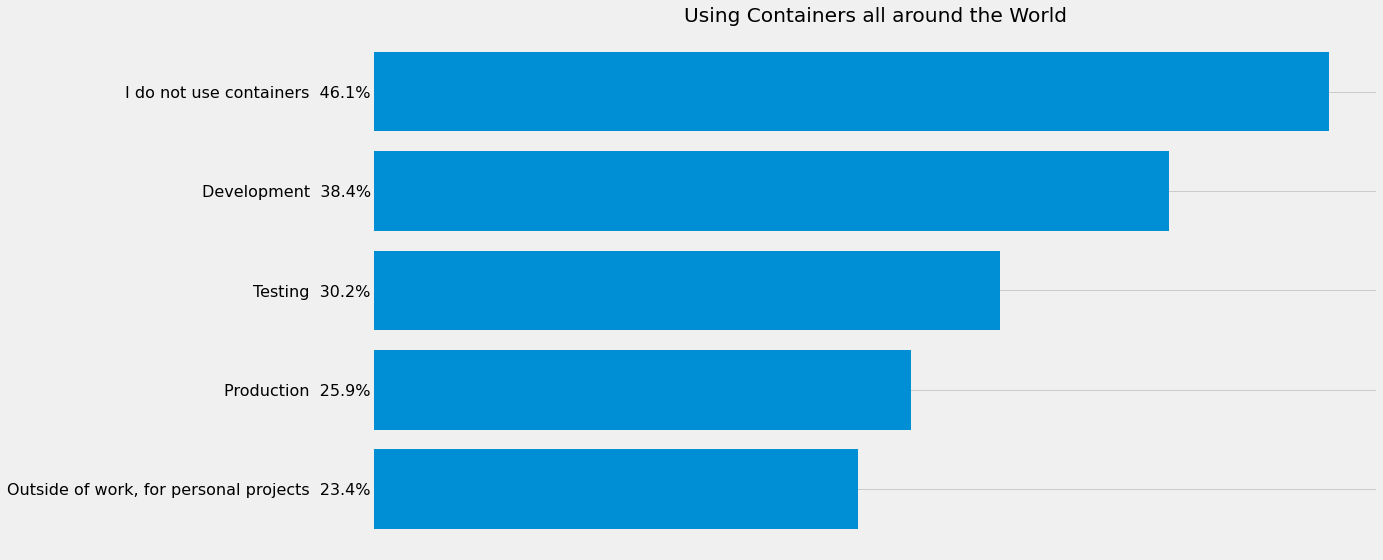

In [53]:
Containers = data["Containers"]
Containers.dropna(inplace = True)

Containers = Containers.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(Containers)  # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, Containers ,"fivethirtyeight", False , (16,9), "Using Containers all around the World") # ვაგებთ გრაფიკს



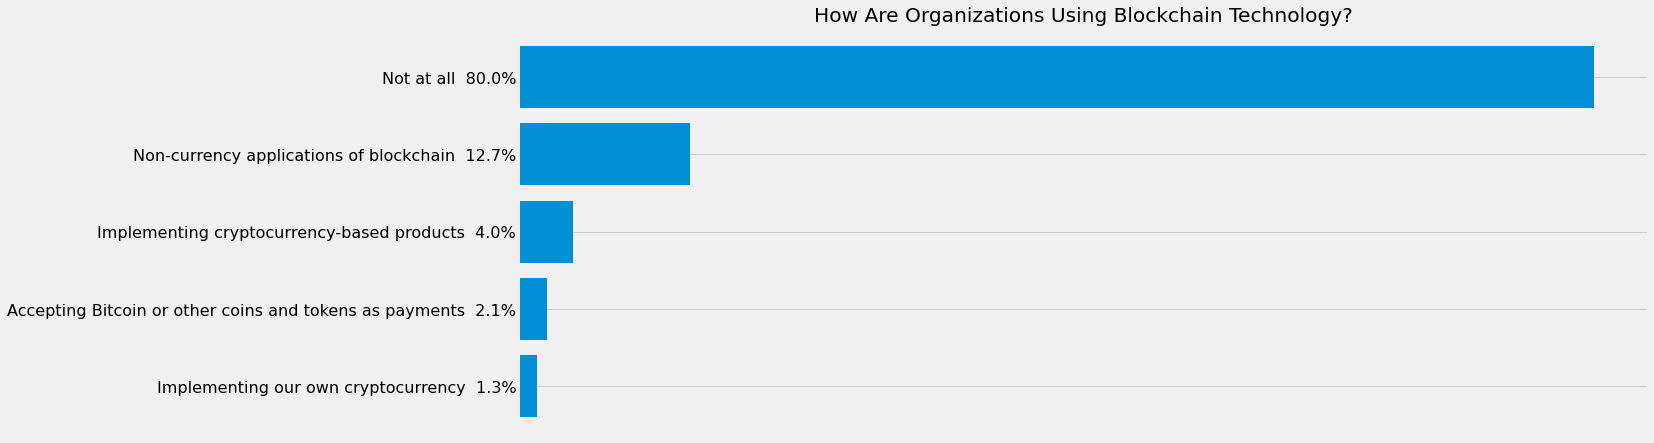

In [54]:
BlockchainOrg = data["BlockchainOrg"]
BlockchainOrg.dropna(inplace = True)

counted = Counter(BlockchainOrg)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, BlockchainOrg ,"fivethirtyeight", False , (18,7), "How Are Organizations Using Blockchain Technology?")   # ვაგებთ გრაფიკს



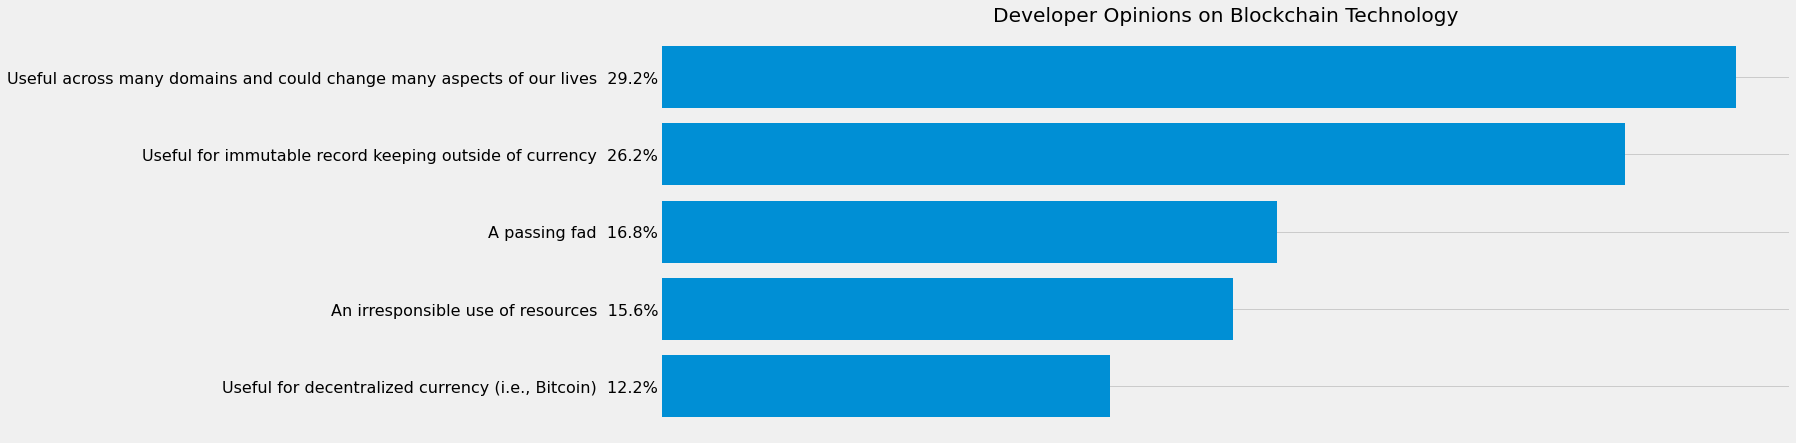

In [55]:
BlockchainIs = data["BlockchainIs"]
BlockchainIs.dropna(inplace = True)

counted = Counter(BlockchainIs)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, BlockchainIs ,"fivethirtyeight", False , (18,7), "Developer Opinions on Blockchain Technology")   # ვაგებთ გრაფიკს


In [56]:
############### What Languages Are Associated with the Highest Salaries Worldwide? -ეგიიი მე ვერ ვნახე 

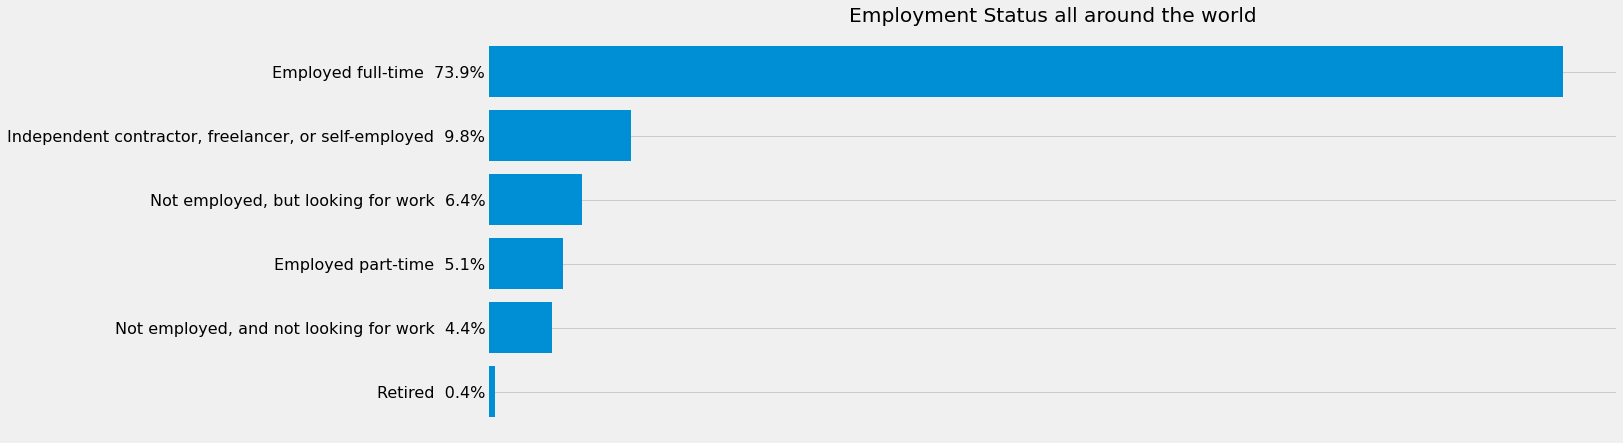

In [57]:
Employment = data["Employment"]
Employment.dropna(inplace = True)

counted = Counter(Employment)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Employment ,"fivethirtyeight", False , (18,7), "Employment Status all around the world")   # ვაგებთ გრაფიკს


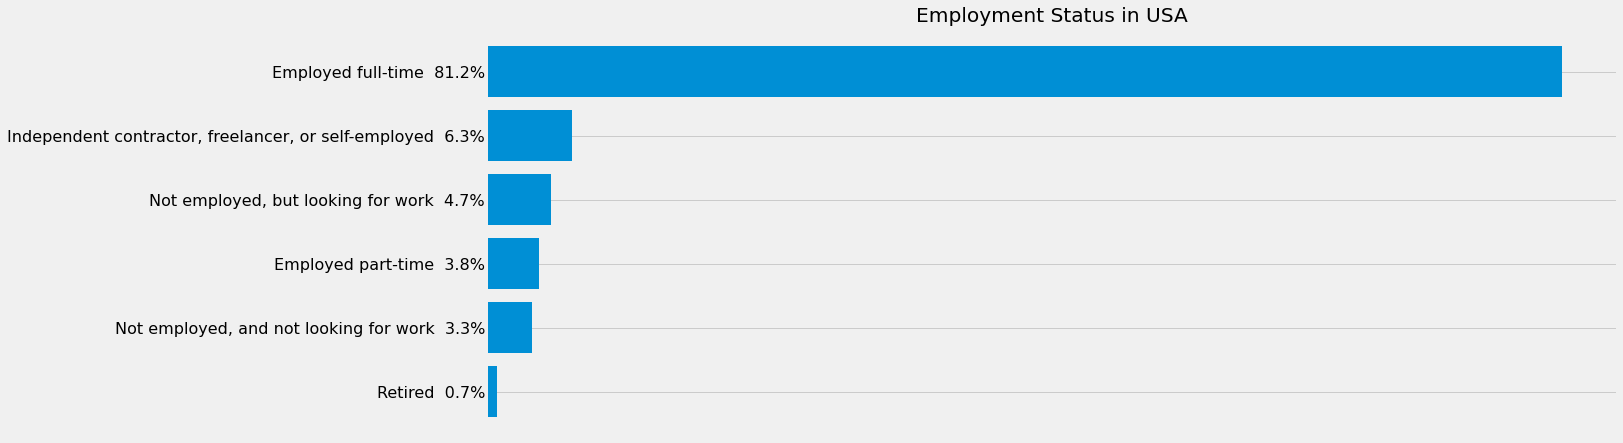

In [58]:
Employment_USA = data["Employment"]

Employment_USA.dropna(inplace = True)

Employment = data[(Employment_USA!= "NaN") & (data["Country"] == "United States")]  


New_Employment = Employment["Employment"]

counted = Counter(New_Employment)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in USA")   # ვაგებთ გრაფიკს


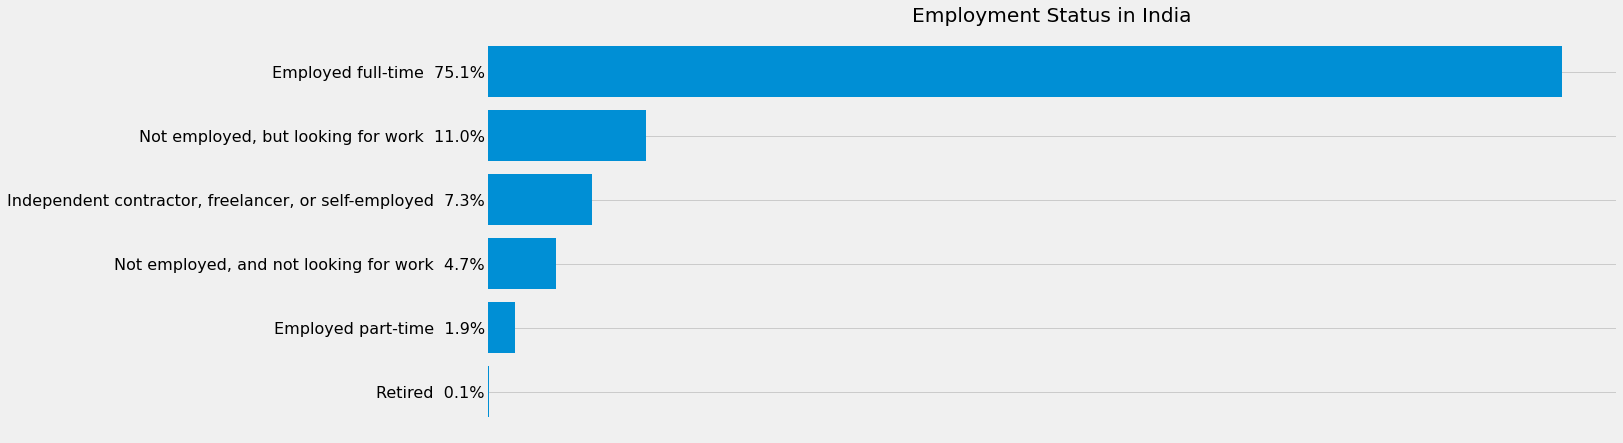

In [59]:
Employment_India = data["Employment"]

Employment_India.dropna(inplace = True)

Employment = data[(Employment_India!= "NaN") & (data["Country"] == "India")]  


New_Employment = Employment["Employment"]

counted = Counter(New_Employment)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in India")   # ვაგებთ გრაფიკს


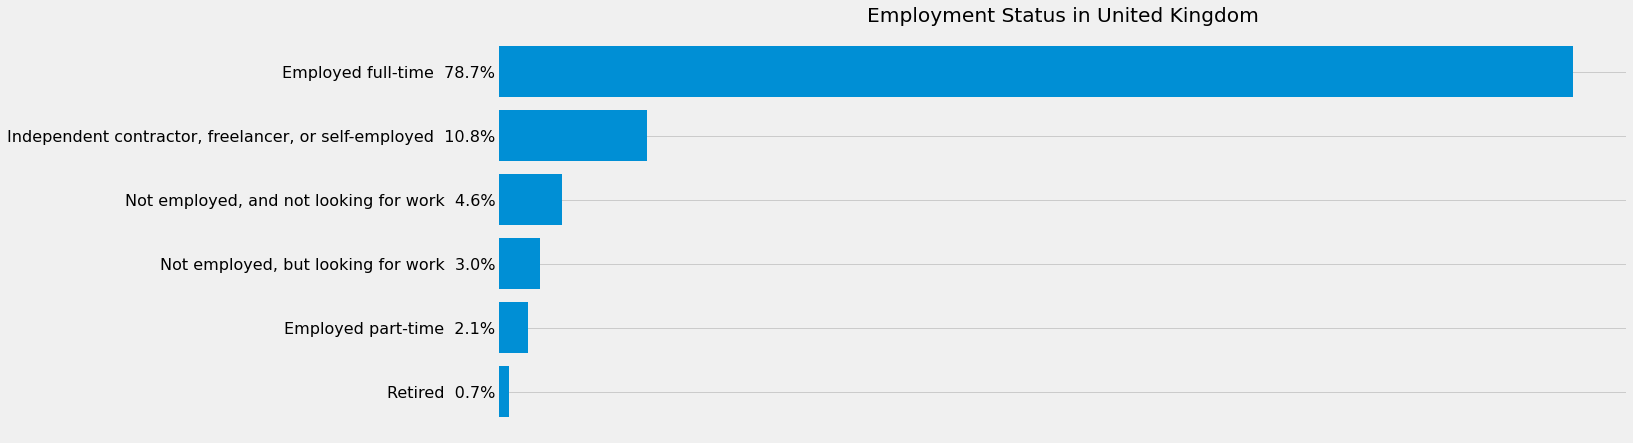

In [60]:
Employment_Kingdom = data["Employment"]

Employment_Kingdom.dropna(inplace = True)

Employment = data[(Employment_Kingdom!= "NaN") & (data["Country"] == "United Kingdom")]  


New_Employment = Employment["Employment"]

counted = Counter(New_Employment)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in United Kingdom")   # ვაგებთ გრაფიკს


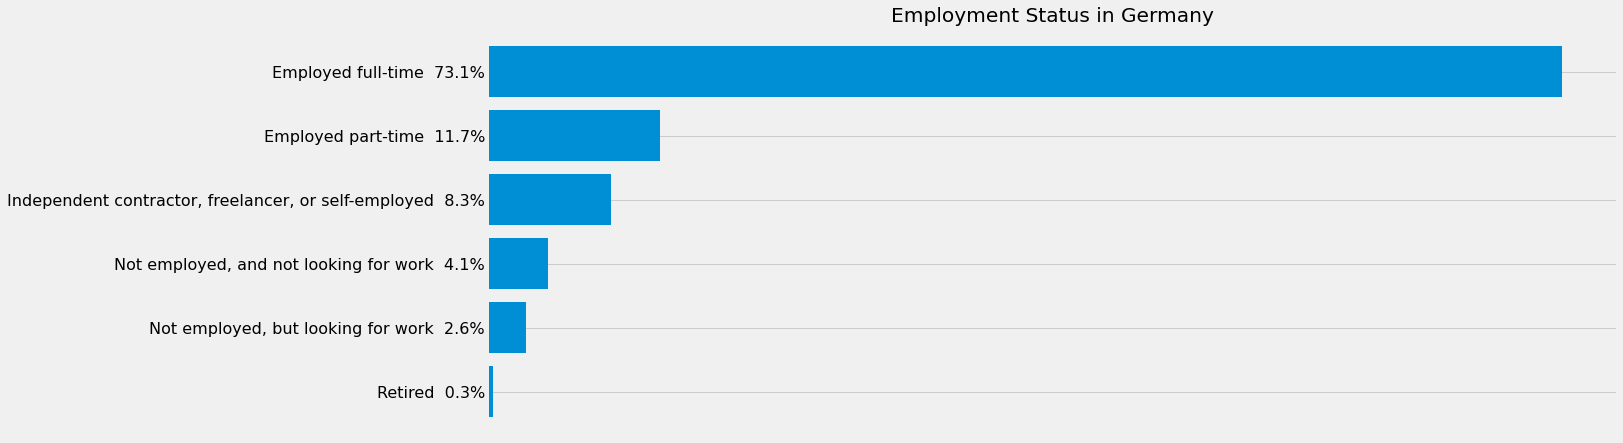

In [61]:
Employment_Germany = data["Employment"]

Employment_Germany.dropna(inplace = True)

Employment = data[(Employment_Germany!= "NaN") & (data["Country"] == "Germany")]  


New_Employment = Employment["Employment"]

counted = Counter(New_Employment)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in Germany")   # ვაგებთ გრაფიკს


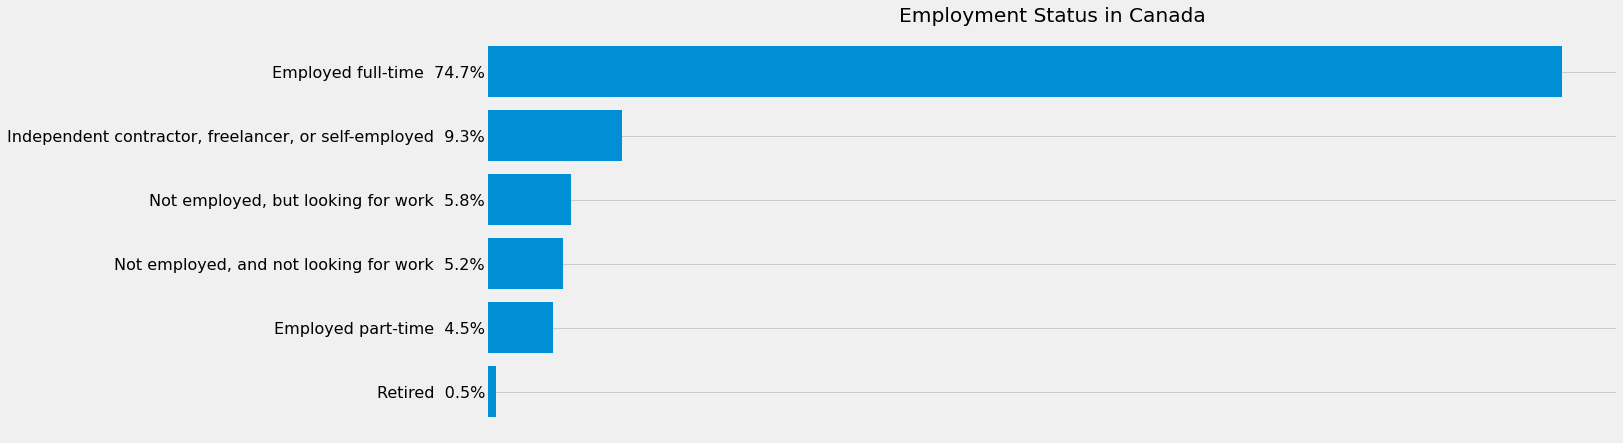

In [62]:
Employment_Canada = data["Employment"]

Employment_Canada.dropna(inplace = True)

Employment = data[(Employment_Canada!= "NaN") & (data["Country"] == "Canada")]  


New_Employment = Employment["Employment"]

counted = Counter(New_Employment)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in Canada")   # ვაგებთ გრაფიკს


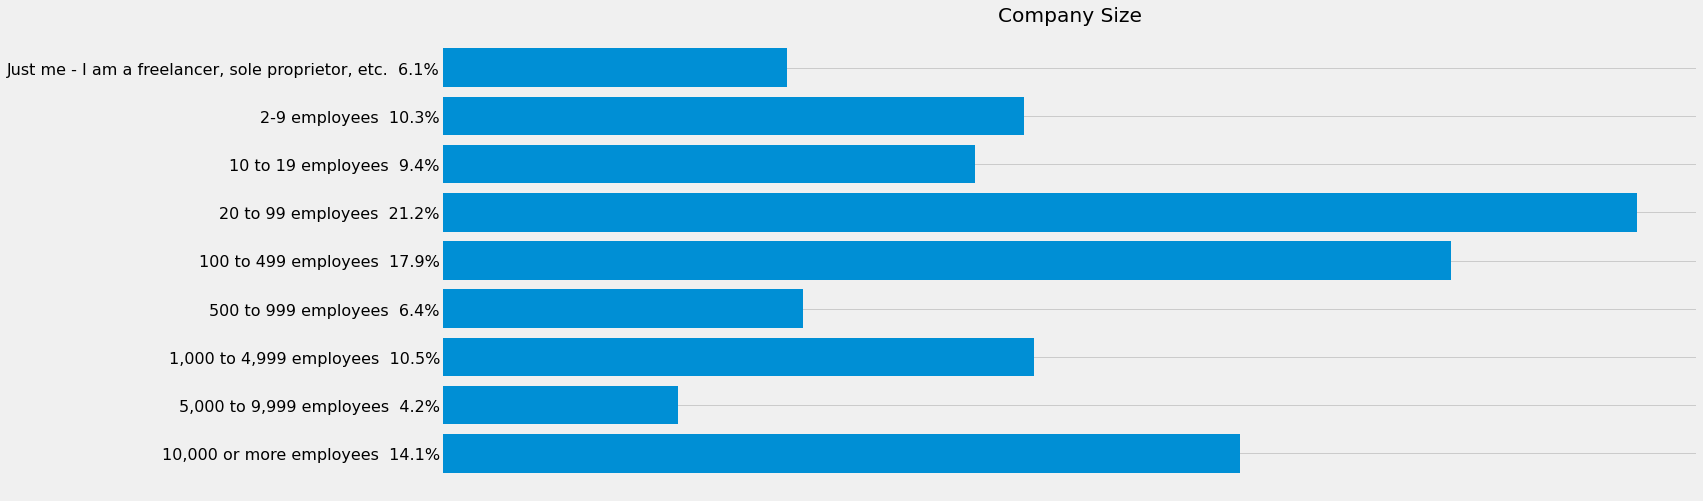

In [63]:
OrgSize = data["OrgSize"]
OrgSize.dropna(inplace = True)

counted = Counter(OrgSize) ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases = ["Just me - I am a freelancer, sole proprietor, etc.", "2-9 employees", "10 to 19 employees","20 to 99 employees",
"100 to 499 employees", "500 to 999 employees", "1,000 to 4,999 employees", "5,000 to 9,999 employees", "10,000 or more employees"]

########## ვქმნით რაოდენობების ცარიელ სიას
Quantity =[]

####### ფრაზების თითოეული ელემეტის შესაბამის რაოდენობებს ვამატებთ რაოდენობის ცარიელ სიაში ########
for i in key_Phrases:
    Quantity.append(counted[i])

key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes( key_Phrases , Quantity, OrgSize ,"fivethirtyeight", False , (20,8), "Company Size")  ### ვაგებთ გრაფიკს

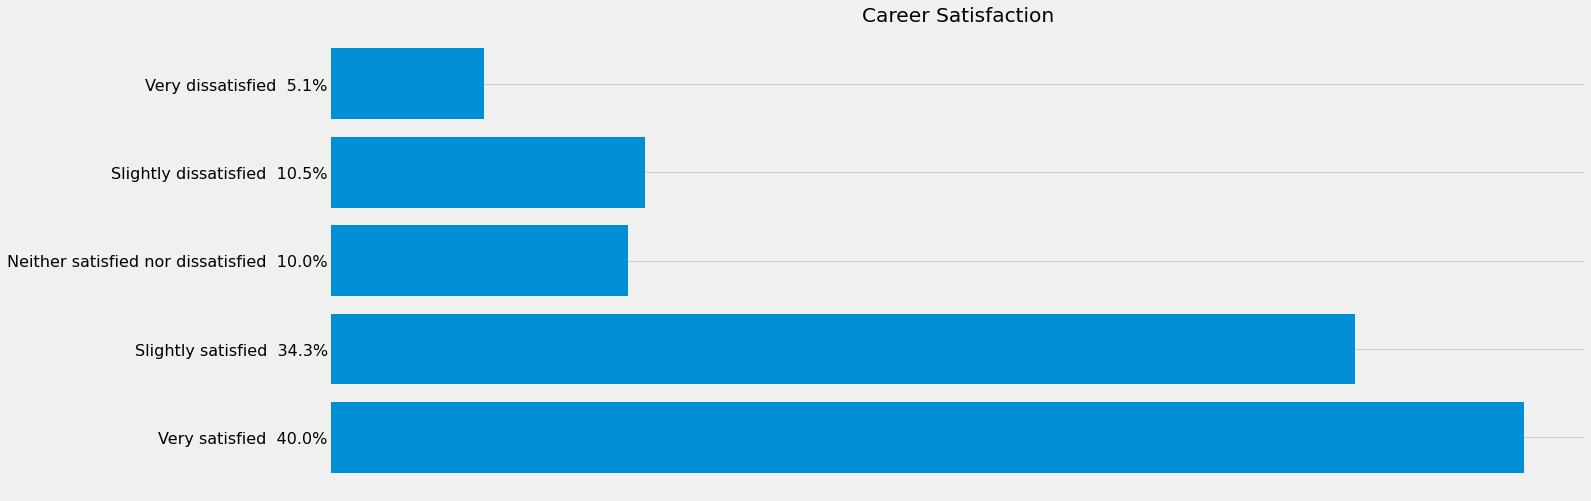

In [64]:
CareerSat = data["CareerSat"]
CareerSat.dropna(inplace = True)

counted = Counter(CareerSat) ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied"]

########## ვქმნით რაოდენობების ცარიელ სიას
Quantity = []

####### ფრაზების თითოეული ელემეტის შესაბამის რაოდენობებს ვამატებთ რაოდენობის ცარიელ სიაში ########
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, CareerSat ,"fivethirtyeight", False , (20,8), "Career Satisfaction")  ####### ვაგებთ გრაფიკს

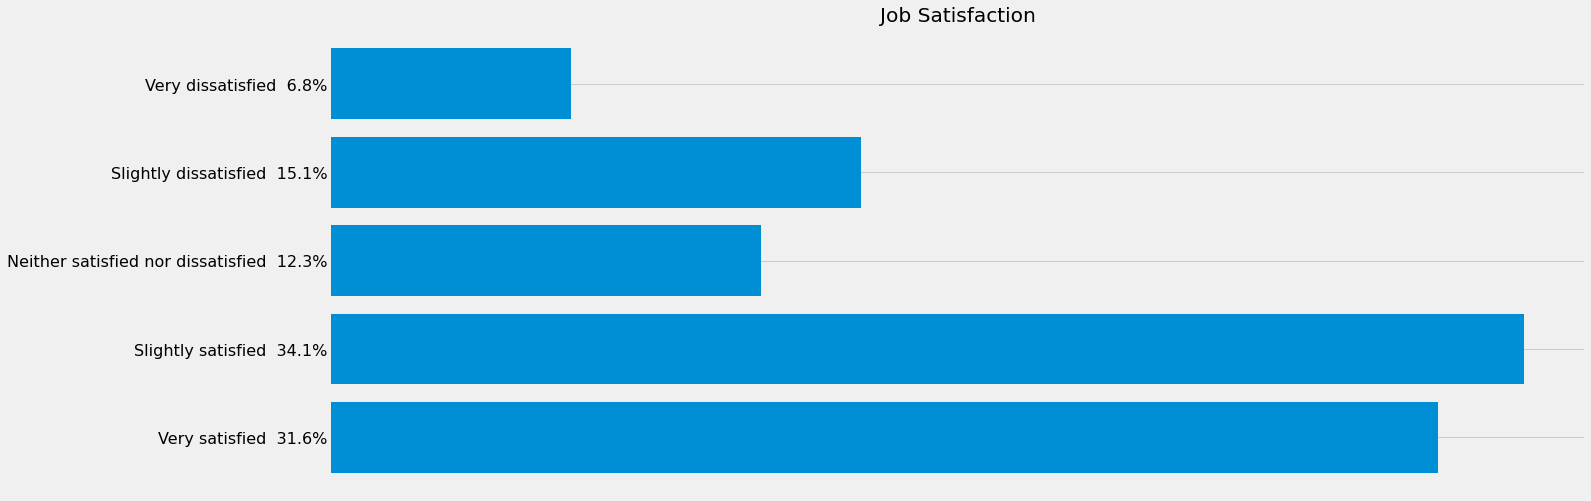

In [65]:
JobSat =  data["JobSat"]
JobSat.dropna(inplace = True)

counted = Counter(JobSat)   ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied"]

########## ვქმნით რაოდენობების ცარიელ სიას
Quantity = []

####### ფრაზების თითოეული ელემეტის შესაბამის რაოდენობებს ვამატებთ რაოდენობის ცარიელ სიაში ########
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, JobSat ,"fivethirtyeight", False , (20,8), "Job Satisfaction")  ### ვაგებთ გრაფიკს



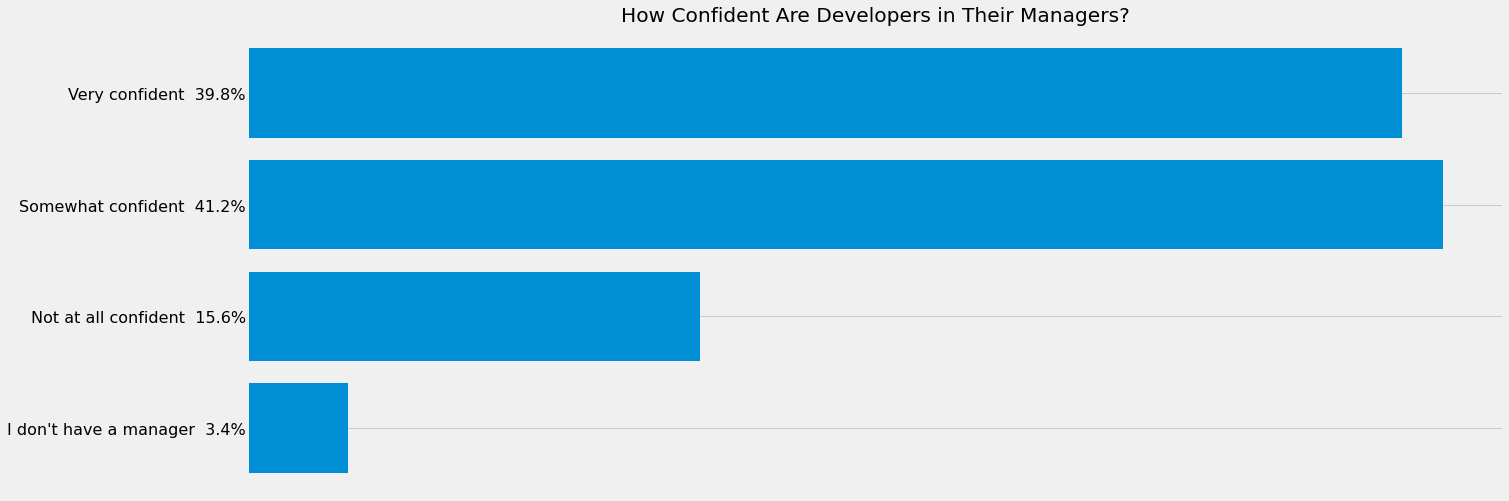

In [66]:
confidence = data["MgrIdiot"]
confidence.dropna(inplace  = True)

counted = Counter(confidence)   ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases = ["I don't have a manager", "Not at all confident", "Somewhat confident", "Very confident"]

########## ვქმნით რაოდენობების ცარიელ სიას
Quantity = []

####### ფრაზების თითოეული ელემეტის შესაბამის რაოდენობებს ვამატებთ რაოდენობის ცარიელ სიაში ########
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, confidence ,"fivethirtyeight", False , (20,8), "How Confident Are Developers in Their Managers?") ### ვაგებთ გრაფიკს

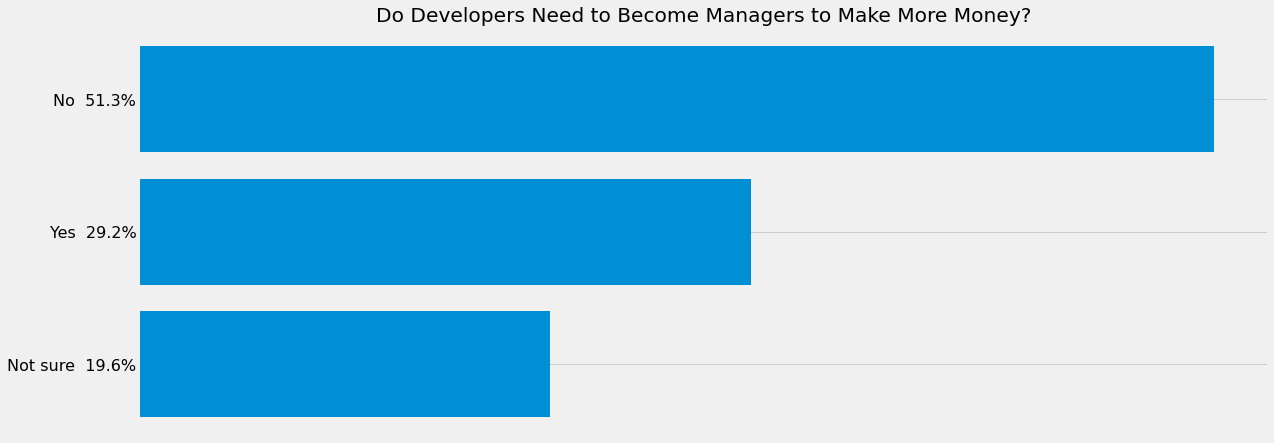

In [67]:
MgrMoney = data["MgrMoney"]
MgrMoney.dropna(inplace = True)

counted = Counter(MgrMoney)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, MgrMoney ,"fivethirtyeight", False , (18,7), "Do Developers Need to Become Managers to Make More Money?")   # ვაგებთ გრაფიკს



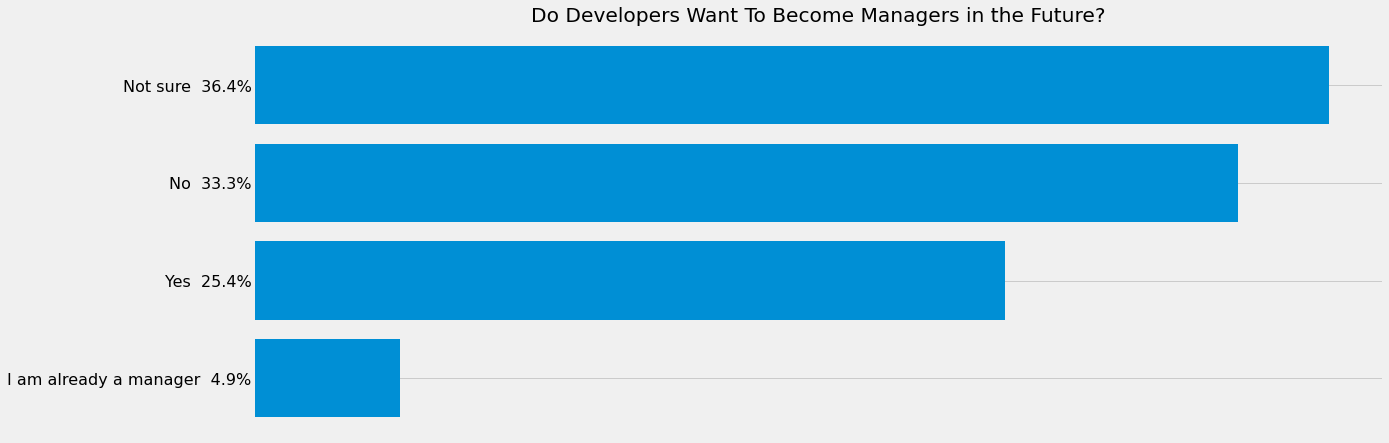

In [68]:
MgrWant = data["MgrWant"]
MgrWant.dropna(inplace = True)

counted = Counter(MgrWant)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, MgrWant ,"fivethirtyeight", False , (18,7), "Do Developers Want To Become Managers in the Future?")   # ვაგებთ გრაფიკს


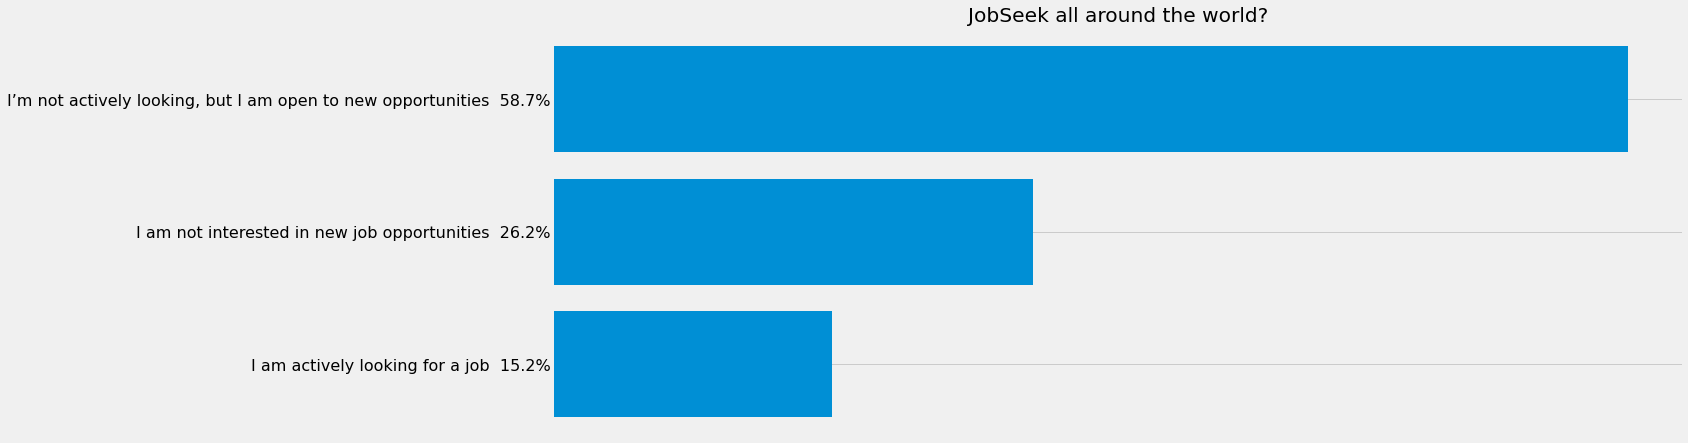

In [69]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace = True)

counted = Counter(JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek all around the world?")   # ვაგებთ გრაფიკს


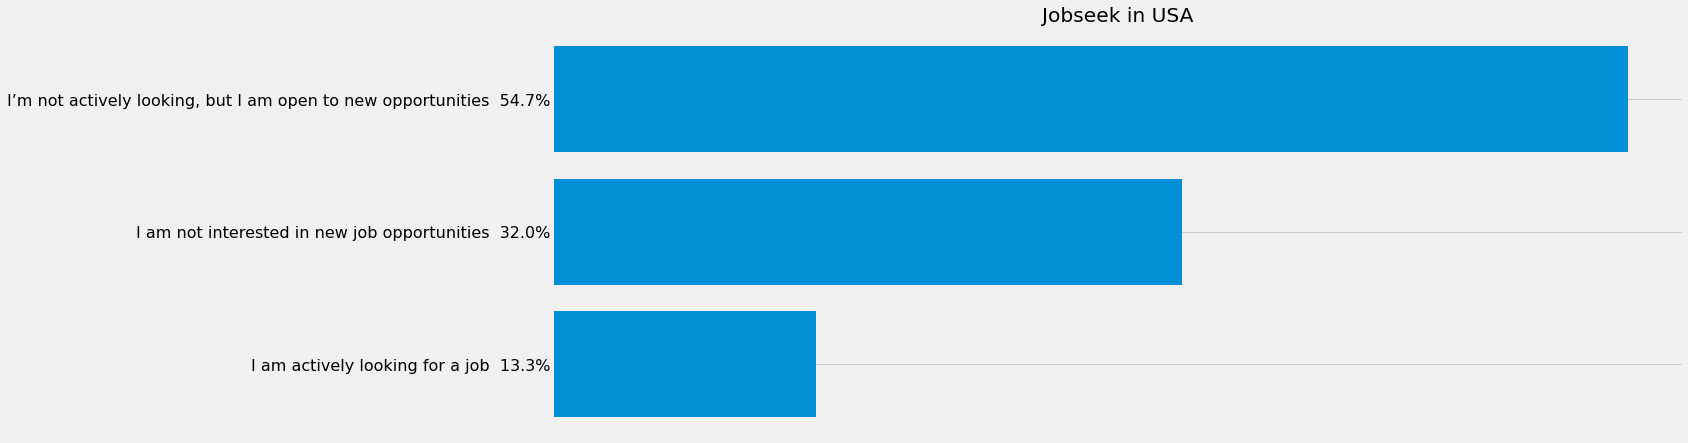

In [70]:

JobSeek_USA = data["JobSeek"]

JobSeek_USA.dropna(inplace = True)

JobSeek = data[(JobSeek_USA!= "NaN") & (data["Country"] == "United States")]  


New_JobSeek = JobSeek["JobSeek"]

counted = Counter(New_JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "Jobseek in USA")   # ვაგებთ გრაფიკს


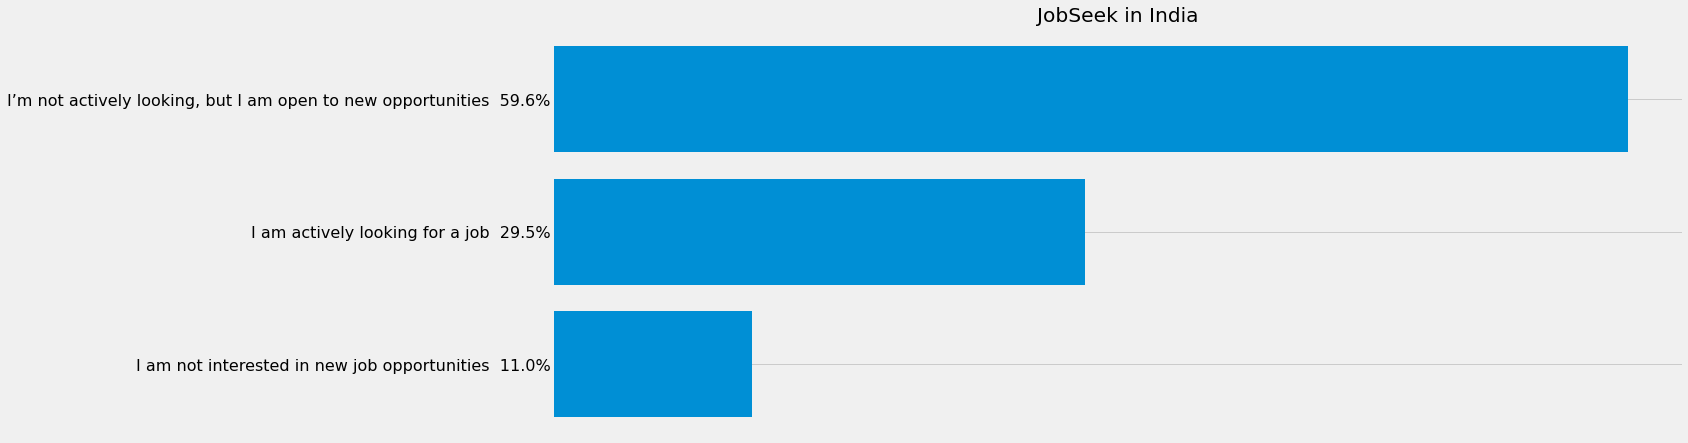

In [71]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace = True)

JobSeek_India = data[(JobSeek!="NaN") & (data["Country"] == "India")]

New_JobSeek = JobSeek_India["JobSeek"]

counted = Counter(New_JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in India")   # ვაგებთ გრაფიკს


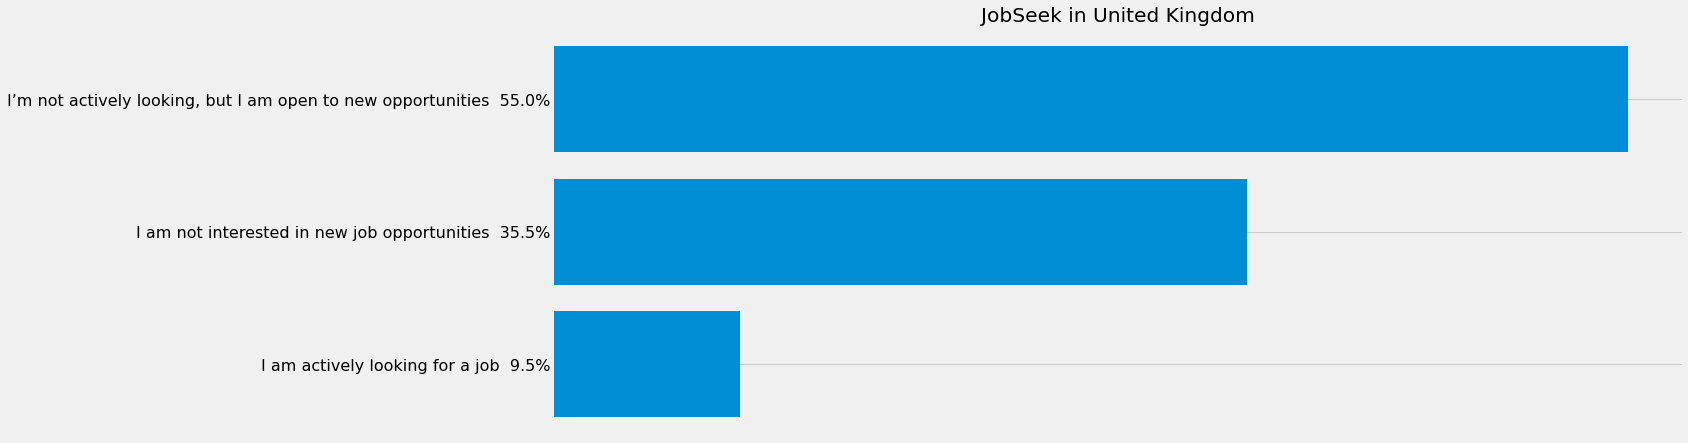

In [72]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace = True)

JobSeek_India = data[(JobSeek!="NaN") & (data["Country"] == "United Kingdom")]

New_JobSeek = JobSeek_India["JobSeek"]

counted = Counter(New_JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in United Kingdom")   # ვაგებთ გრაფიკს


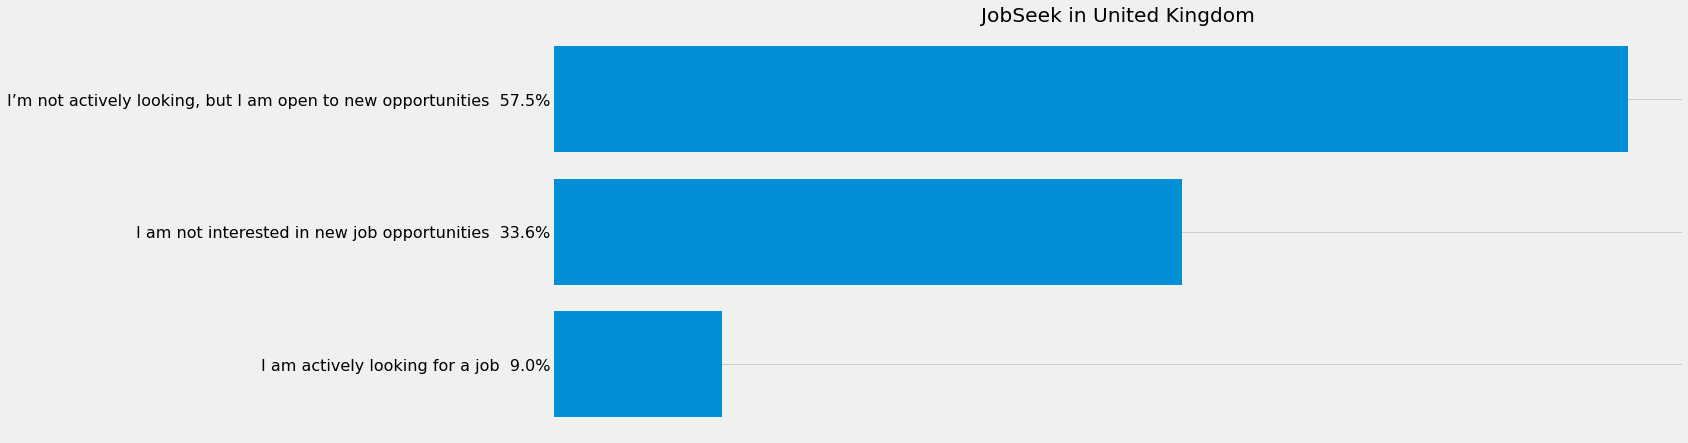

In [73]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace = True)

JobSeek_India = data[(JobSeek!="NaN") & (data["Country"] == "Germany")]

New_JobSeek = JobSeek_India["JobSeek"]

counted = Counter(New_JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in United Kingdom")   # ვაგებთ გრაფიკს


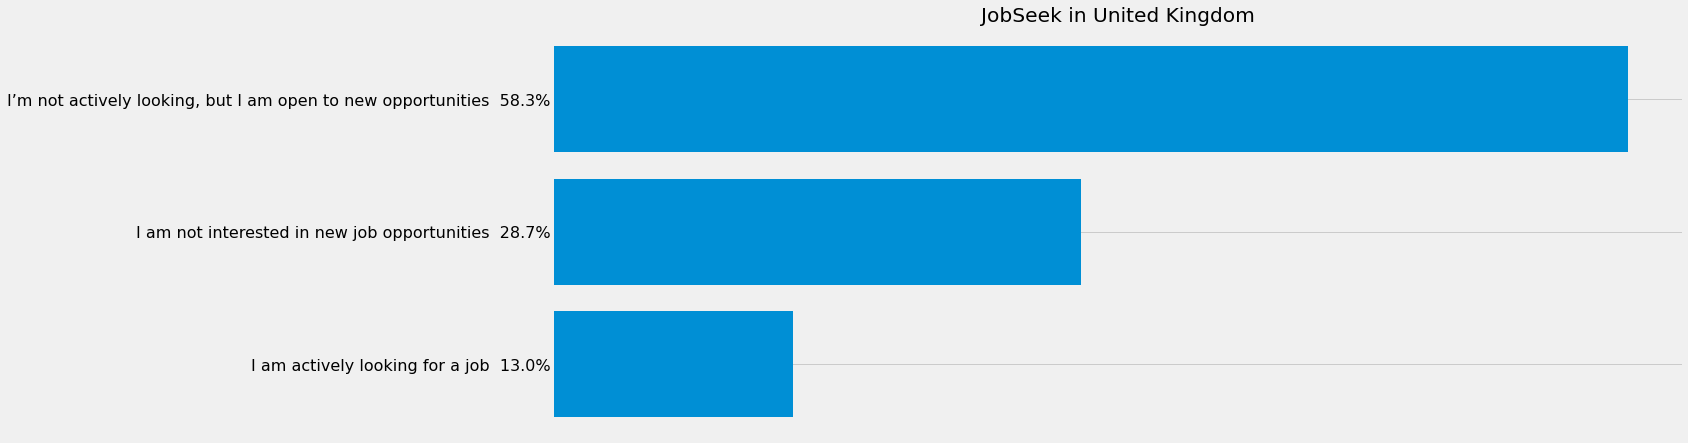

In [74]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace = True)

JobSeek_India = data[(JobSeek!="NaN") & (data["Country"] == "Canada")]

New_JobSeek = JobSeek_India["JobSeek"]

counted = Counter(New_JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in United Kingdom")   # ვაგებთ გრაფიკს


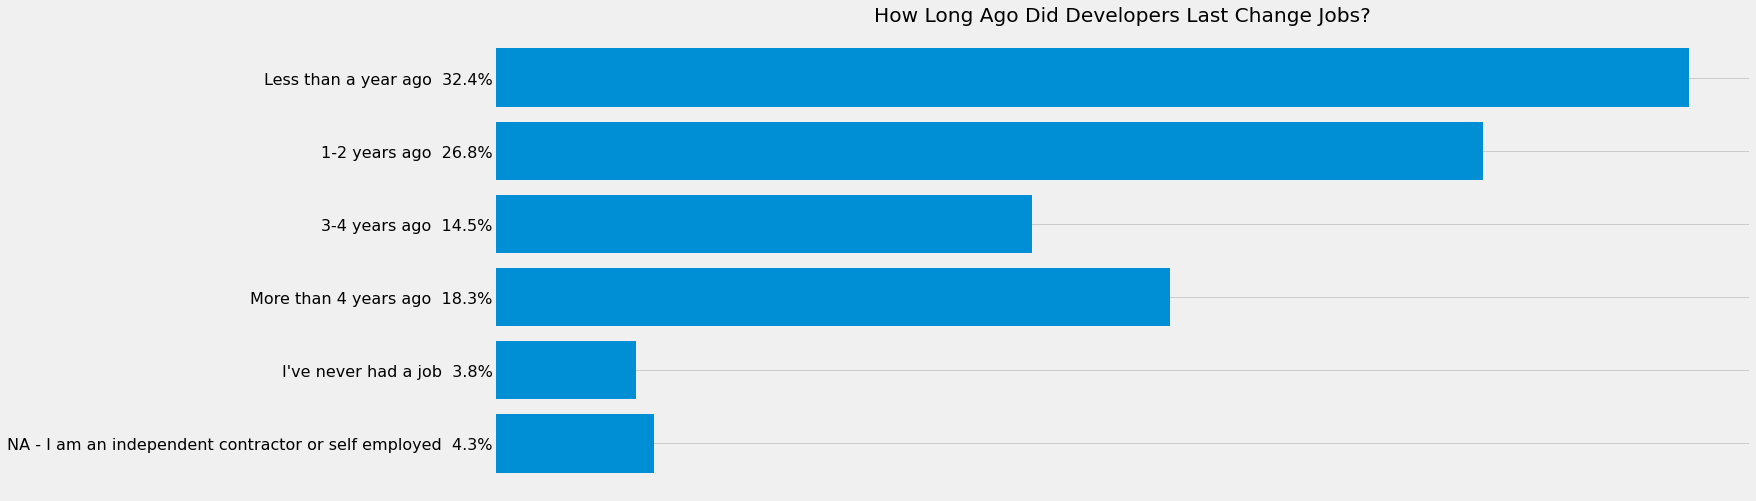

In [76]:
change_job = data["LastHireDate"]
change_job.dropna(inplace =True)

counted  = Counter(change_job)  ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["NA - I am an independent contractor or self employed", "I've never had a job", "More than 4 years ago", "3-4 years ago", 
 "1-2 years ago", "Less than a year ago"]

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, change_job ,"fivethirtyeight", False , (20,8), "How Long Ago Did Developers Last Change Jobs?")


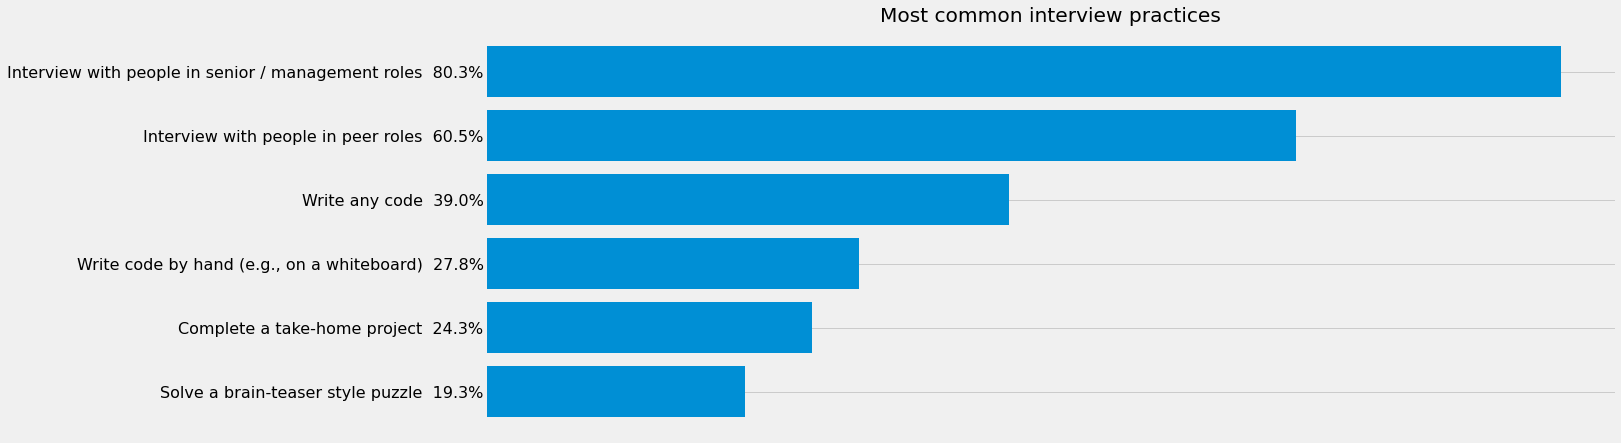

In [83]:
LastInt = data["LastInt"]
LastInt.dropna(inplace = True)

LastInt = LastInt.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(LastInt)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს

Build_Barh_sizes( key_Phrases , Quantity, LastInt ,"fivethirtyeight", False , (18,7), "Most common interview practices")   # ვაგებთ გრაფიკს



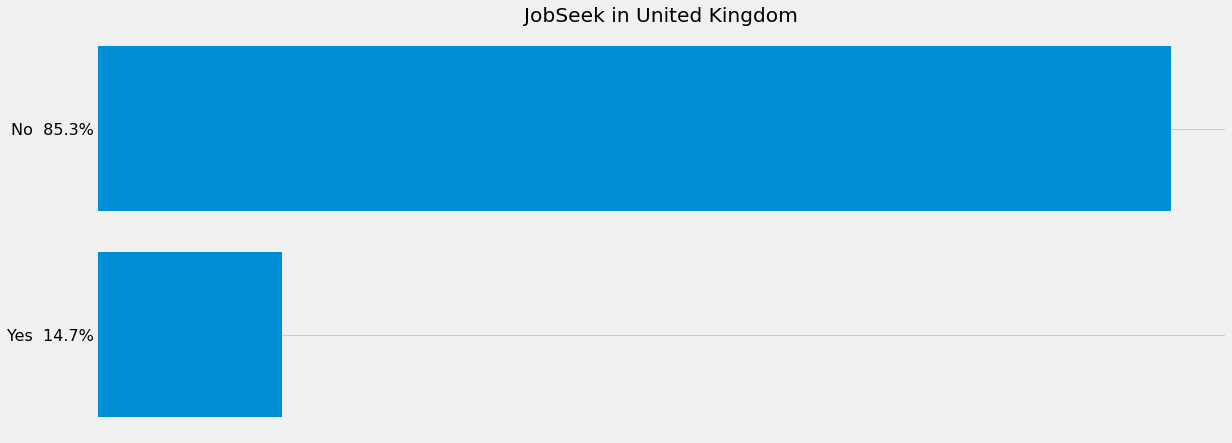

In [88]:
FizzBuzz = data["FizzBuzz"]
FizzBuzz.dropna(inplace = True)

counted = Counter(FizzBuzz)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, FizzBuzz ,"fivethirtyeight", False , (18,7), "JobSeek in United Kingdom")   # ვაგებთ გრაფიკს


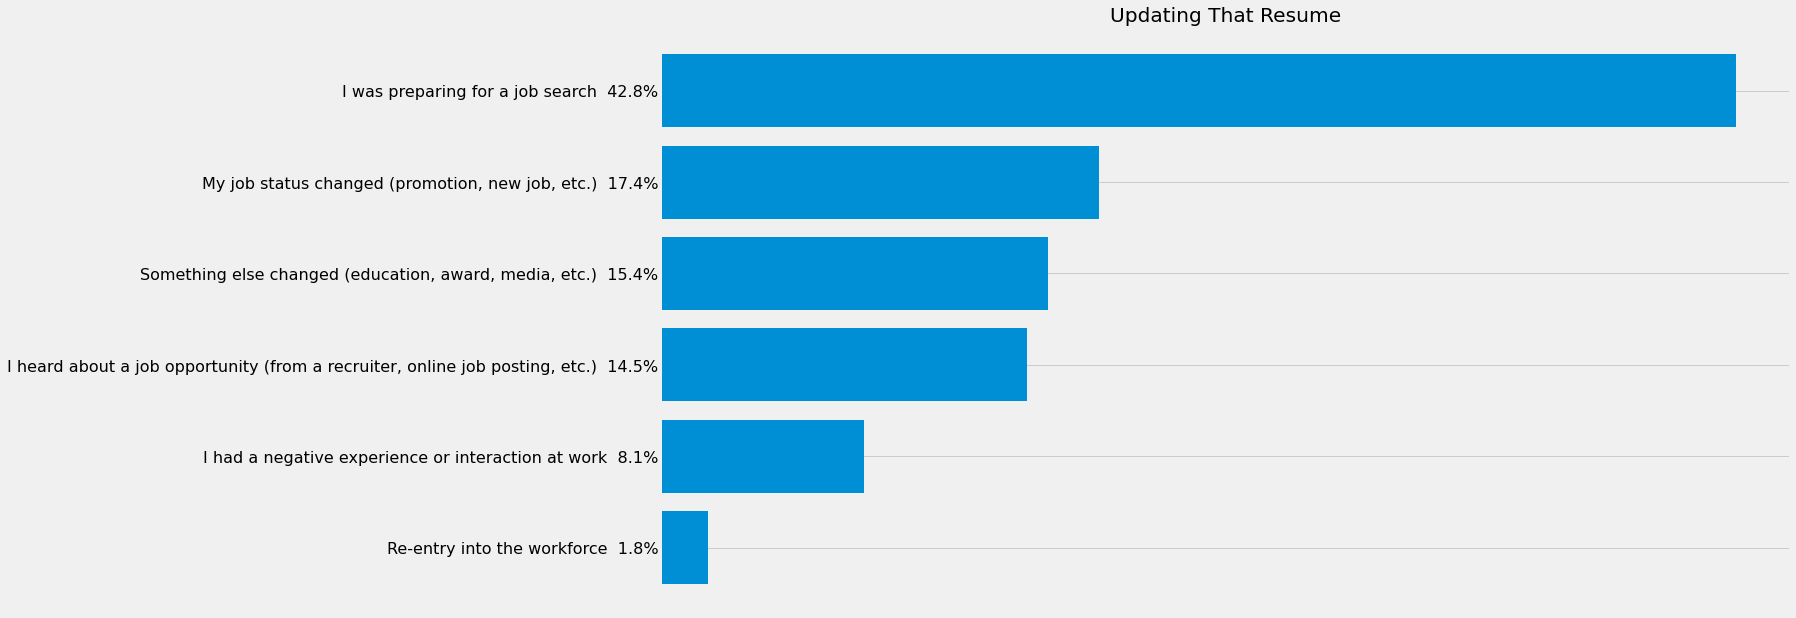

In [99]:
ResumeUpdate = data["ResumeUpdate"]
ResumeUpdate.dropna(inplace = True)

counted = Counter(ResumeUpdate)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, ResumeUpdate ,"fivethirtyeight", False , (18,10), "Updating That Resume")   # ვაგებთ გრაფიკს


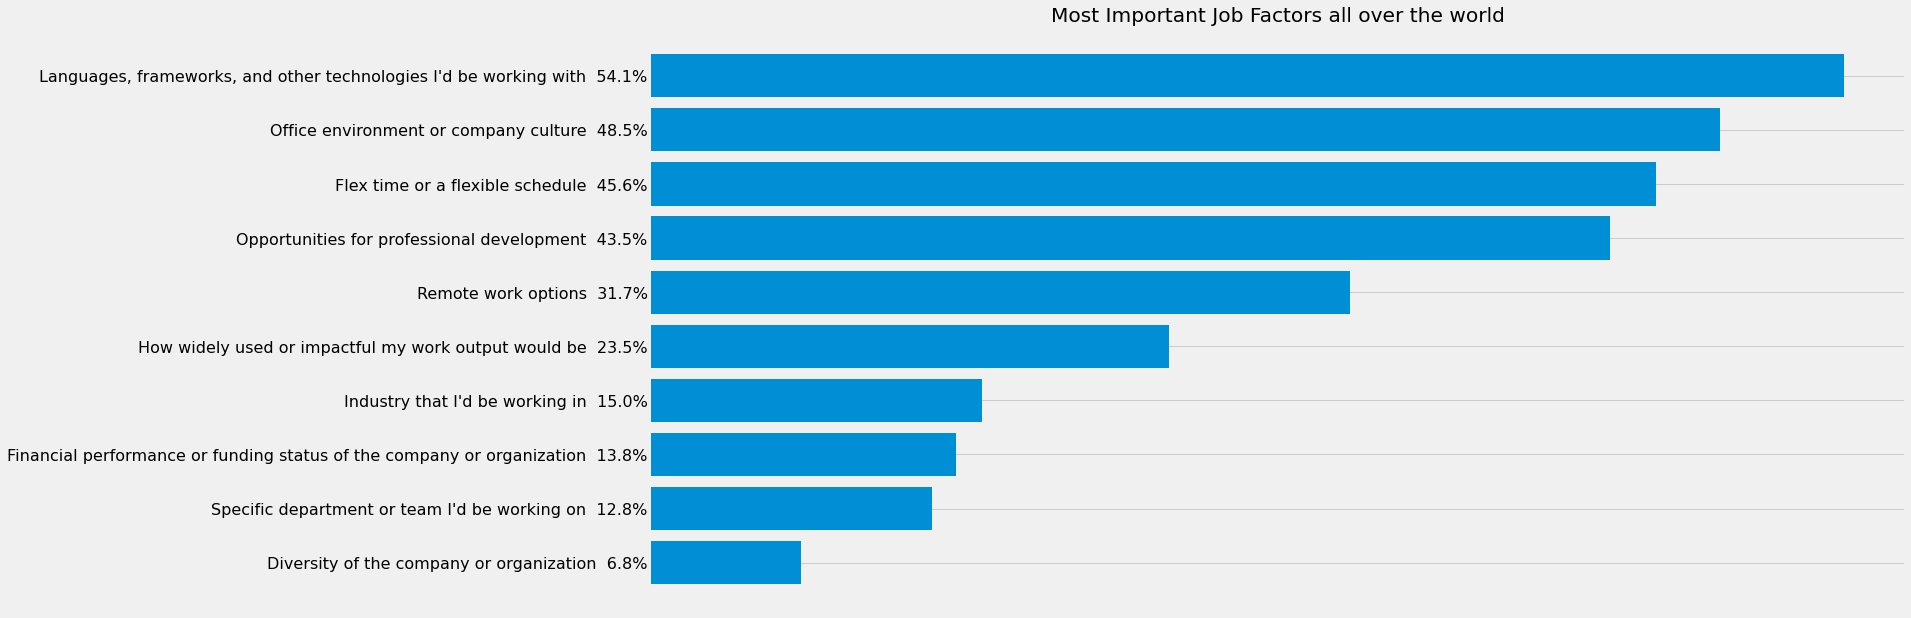

In [109]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace = True)

JobFactors = JobFactors.str.split(";")

list_sorter_counter(JobFactors)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors ,"fivethirtyeight", False , (20,10), "Most Important Job Factors all over the world")



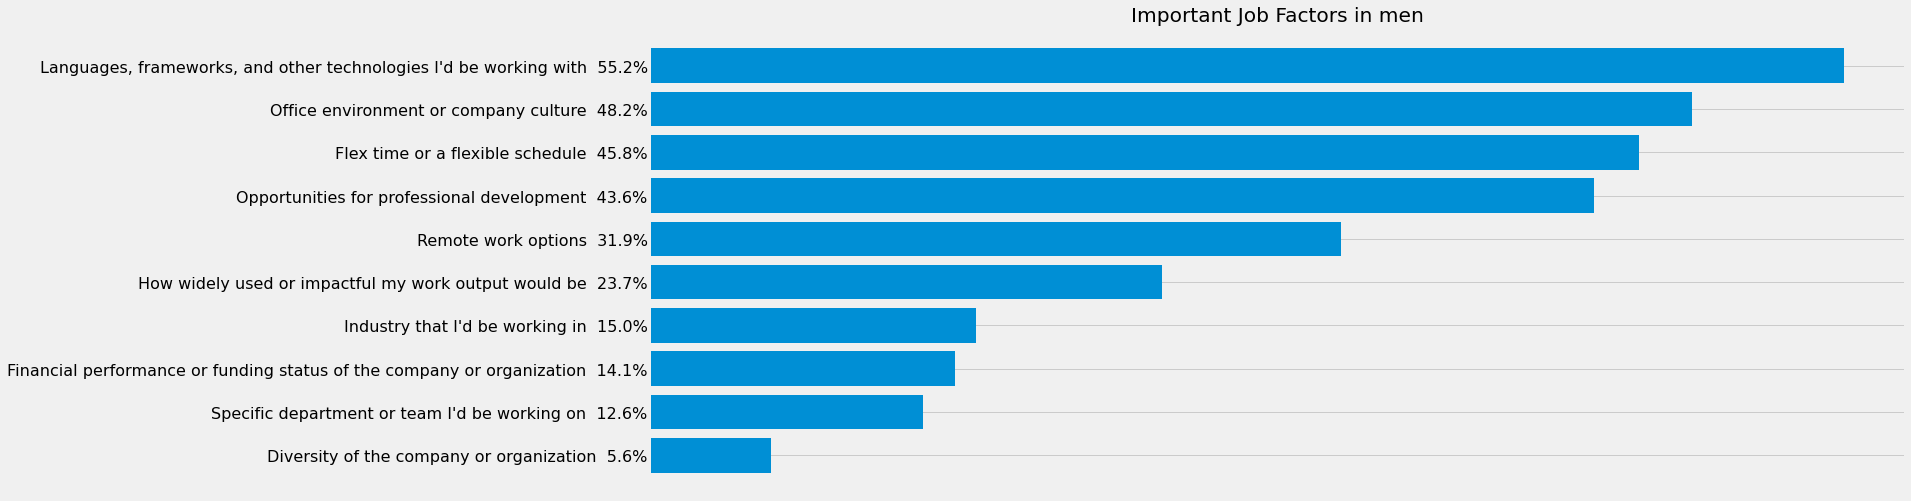

In [145]:
JobFactors  = data["JobFactors"]
JobFactors.dropna(inplace = True )

JobFactors_man =   data[ (JobFactors != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
JobFactors_man = JobFactors_man["JobFactors"]
JobFactors_man = JobFactors_man.str.split(";")

list_sorter_counter(JobFactors_man)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors_man ,"fivethirtyeight", False , (20,8), "Important Job Factors in men")



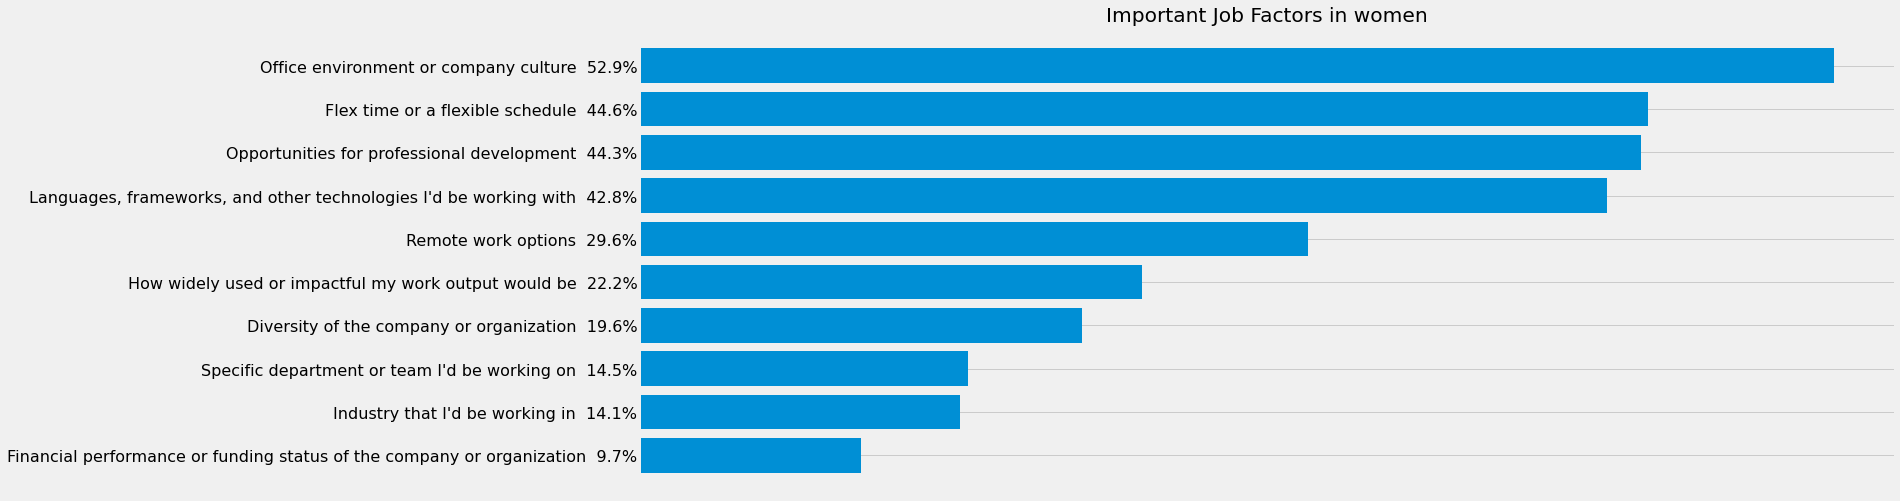

In [149]:
JobFactors  = data["JobFactors"]
JobFactors.dropna(inplace = True )

JobFactors_woman =   data[ (JobFactors != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
JobFactors_woman = JobFactors_woman["JobFactors"]
JobFactors_woman = JobFactors_woman.str.split(";")

list_sorter_counter(JobFactors_man)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors_woman ,"fivethirtyeight", False , (20,8), "Important Job Factors in women")


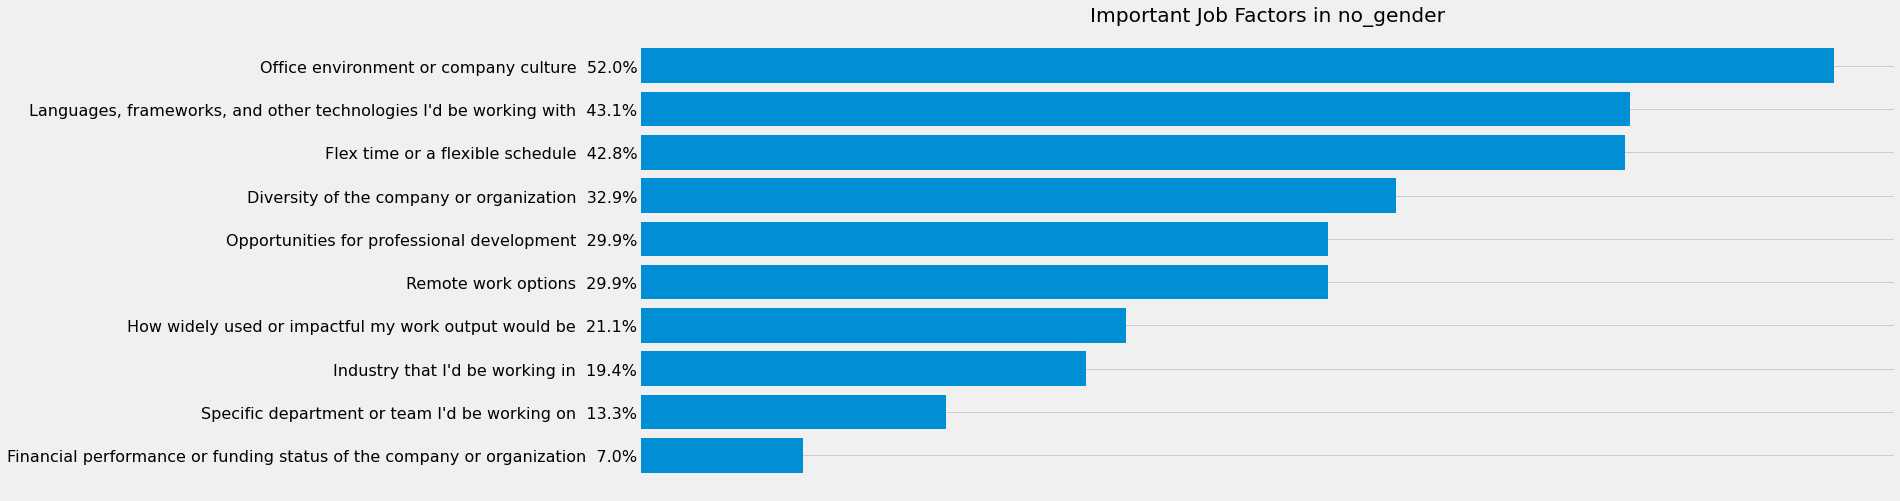

In [151]:
JobFactors  = data["JobFactors"]
JobFactors.dropna(inplace = True )

JobFactors_no_gender =   data[ (JobFactors != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
JobFactors_no_gender = JobFactors_no_gender["JobFactors"]
JobFactors_no_gender = JobFactors_no_gender.str.split(";")

list_sorter_counter(JobFactors_no_gender)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors_no_gender ,"fivethirtyeight", False , (20,8), "Important Job Factors in no_gender")
